# **Process**
Below are several analyses of eight Guy de Maupassant Short stories:   
   
1) Boule de Suif  
2) Found on a drown man    
3) Mademoiselle Fifi  
4) Miss Harriet  
5) My Uncle Jules  
6) The Diamond Necklace  
7) The Piece of String  
8) The Wreck

After a planning period, we each developed these analyses separately, and then compiled them together in a single notebook. The analyses are as follows:    
  
a. Sentiement Analysis  
b. Word Frequency  
c. TF-IDF  
d. Analysis using 1850 Tokens

# **Analyses**

#Sentiment Analysis 

##Set-up: Overheads

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving THE_WRECK.txt to THE_WRECK.txt
Saving THE_PIECE_OF_STRING.txt to THE_PIECE_OF_STRING.txt
Saving MISS_HARRIET.txt to MISS_HARRIET.txt
Saving MADEMOISELLE_FIFI.txt to MADEMOISELLE_FIFI.txt
Saving MY_UNCLE_JULES.txt to MY_UNCLE_JULES.txt
Saving FOUND_ON_A_DROWNED_MAN.txt to FOUND_ON_A_DROWNED_MAN.txt
Saving BOULE_DE_SUIF.txt to BOULE_DE_SUIF.txt
Saving THE_DIAMOND_NECKLACE.txt to THE_DIAMOND_NECKLACE.txt


##<i>My Uncle Yules</i>, 1883

###Text Preparation

In [ ]:
jules_83 = []
with open('MY_UNCLE_JULES.txt', 'r') as jules_f:
  for line in jules_f.readlines():
    jules_83.append(line.strip())
jules_83[:10]

['MY UNCLE JULES',
 'A white-haired old man begged us for alms. My companion, Joseph Davranche, gave him five francs. Noticing my surprised look, he said:',
 '',
 '“That poor unfortunate reminds me of a story which I shall tell you, the memory of which continually pursues me. Here it is:',
 '',
 '“My family, which came originally from Havre, was not rich. We just managed to make both ends meet. My father worked hard, came home late from the office, and earned very little. I had two sisters.',
 '',
 '“My mother suffered a good deal from our reduced circumstances, and she often had harsh words for her husband, veiled and sly reproaches. The poor man then made a gesture which used to distress me. He would pass his open hand over his forehead, as if to wipe away perspiration which did not exist, and he would answer nothing. I felt his helpless suffering. We economized on everything, and never would accept an invitation to dinner, so as not to have to return the courtesy. All our provisions

In [ ]:
#Remove space between lines
#Do Twice: the Colab might not clean up all the spaces at the first time
for line in jules_83:
  if line == "":
    jules_83.remove(line)
pprint(jules_83)
for line in jules_83:
  if line == "":
    jules_83.remove(line)
pprint(jules_83)

['MY UNCLE JULES',
 'A white-haired old man begged us for alms. My companion, Joseph Davranche, '
 'gave him five francs. Noticing my surprised look, he said:',
 '“That poor unfortunate reminds me of a story which I shall tell you, the '
 'memory of which continually pursues me. Here it is:',
 '“My family, which came originally from Havre, was not rich. We just managed '
 'to make both ends meet. My father worked hard, came home late from the '
 'office, and earned very little. I had two sisters.',
 '“My mother suffered a good deal from our reduced circumstances, and she '
 'often had harsh words for her husband, veiled and sly reproaches. The poor '
 'man then made a gesture which used to distress me. He would pass his open '
 'hand over his forehead, as if to wipe away perspiration which did not exist, '
 'and he would answer nothing. I felt his helpless suffering. We economized on '
 'everything, and never would accept an invitation to dinner, so as not to '
 'have to return the cou

###Optional: Remove Quotation Marks

To use Vader, we combine the sentences into one string object, which resembles one single running-on paragraphs, so the multi-paragraph quotations becomes redundant.

In [ ]:
#start of the multi-paragraph quotation
jules_83[2]

'“That poor unfortunate reminds me of a story which I shall tell you, the memory of which continually pursues me. Here it is:'

In [ ]:
jules_83[-1:]
#end of the multiparagraph quotation

['“As we approached the breakwater a violent desire seized me once more to see my Uncle Jules, to be near him, to say to him something consoling, something tender. But as no one was eating any more oysters, he had disappeared, having probably gone below to the dirty hold which was the home of the poor wretch.”']

In [ ]:
#Everything after the first "
jules_quote = jules_83[3:]

In [ ]:
#To double check
jules_quote[0]

'“My family, which came originally from Havre, was not rich. We just managed to make both ends meet. My father worked hard, came home late from the office, and earned very little. I had two sisters.'

In [ ]:
jules_quote[-1]

'“As we approached the breakwater a violent desire seized me once more to see my Uncle Jules, to be near him, to say to him something consoling, something tender. But as no one was eating any more oysters, he had disappeared, having probably gone below to the dirty hold which was the home of the poor wretch.”'

In [ ]:
#remove redundant quotation marks
jules_83 = jules_83[:3] #Everything before the first ", inclusive
for line in jules_quote:
  if "“" in line:
    stripped_line = line.strip("“")
    jules_83.append(stripped_line)
jules_83[:10] #check

['MY UNCLE JULES',
 'A white-haired old man begged us for alms. My companion, Joseph Davranche, gave him five francs. Noticing my surprised look, he said:',
 '“That poor unfortunate reminds me of a story which I shall tell you, the memory of which continually pursues me. Here it is:',
 'My family, which came originally from Havre, was not rich. We just managed to make both ends meet. My father worked hard, came home late from the office, and earned very little. I had two sisters.',
 'My mother suffered a good deal from our reduced circumstances, and she often had harsh words for her husband, veiled and sly reproaches. The poor man then made a gesture which used to distress me. He would pass his open hand over his forehead, as if to wipe away perspiration which did not exist, and he would answer nothing. I felt his helpless suffering. We economized on everything, and never would accept an invitation to dinner, so as not to have to return the courtesy. All our provisions were bought at b

In [ ]:
#Join
jules_83_str = " ".join(jules_83)
jules_83_str[:100]

'MY UNCLE JULES A white-haired old man begged us for alms. My companion, Joseph Davranche, gave him f'

###Sentiment Analysis

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [ ]:
#Tokenized sentences
jules_83_sentences = tokenizer.tokenize(jules_83_str)
for number, sentence in enumerate(jules_83_sentences):
    print(number, sentence)

0 MY UNCLE JULES A white-haired old man begged us for alms.
1 My companion, Joseph Davranche, gave him five francs.
2 Noticing my surprised look, he said: “That poor unfortunate reminds me of a story which I shall tell you, the memory of which continually pursues me.
3 Here it is: My family, which came originally from Havre, was not rich.
4 We just managed to make both ends meet.
5 My father worked hard, came home late from the office, and earned very little.
6 I had two sisters.
7 My mother suffered a good deal from our reduced circumstances, and she often had harsh words for her husband, veiled and sly reproaches.
8 The poor man then made a gesture which used to distress me.
9 He would pass his open hand over his forehead, as if to wipe away perspiration which did not exist, and he would answer nothing.
10 I felt his helpless suffering.
11 We economized on everything, and never would accept an invitation to dinner, so as not to have to return the courtesy.
12 All our provisions were 

In [ ]:
#Note Sentence 50-2: The Tokenizer does not recognize "..." as a single punctutaion mark
#So, remove manually
jules_83_sentences.remove(jules_83_sentences[50])
jules_83_sentences.remove(jules_83_sentences[50])
jules_83_sentences.remove(jules_83_sentences[50])

In [ ]:
#Convert into data frame
jules_83_sentence_scores = []
for number, sentence in enumerate(jules_83_sentences):
  scores = sentiment_analyzer.polarity_scores(sentence)
  jules_83_sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})

In [ ]:
jules_83_df = pd.DataFrame(jules_83_sentence_scores)

###Graphing

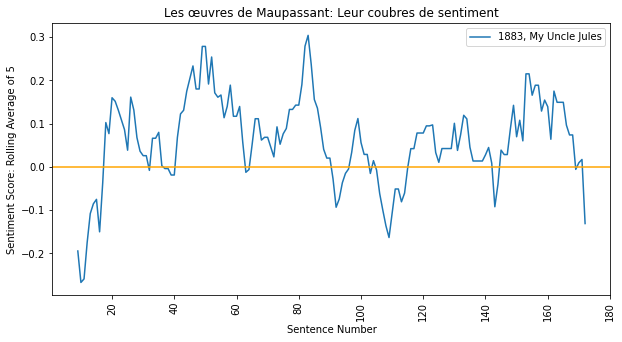

In [ ]:
ax = jules_83_df.rolling(10)['sentiment_score'].mean().plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title = "Les œuvres de Maupassant: Leur coubres de sentiment", label = "1883, My Uncle Jules",legend = True)
ax.set_xlabel("Sentence Number")
ax.set_ylabel("Sentiment Score: Rolling Average of 5")
plt.axhline(y=0, color='orange', linestyle='-')

###Normalized Graph: For Comparing shapes

In [ ]:
jules_83_rolling_score = jules_83_df.rolling(5)['sentiment_score'].mean()

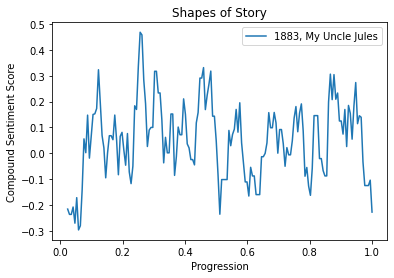

In [ ]:
x_83 = np.linspace(0, 1, len(jules_83_sentences))
fig, ax = plt.subplots()
ax.plot(x_83, jules_83_rolling_score, label = "1883, My Uncle Jules")
plt.xlabel("Progression")
plt.ylabel("Compound Sentiment Score")
plt.title("Shapes of Story")
plt.legend(loc = 0)

##Boule de suif, 1880

###Text-Preparation

In [ ]:
suif_80 = []
with open('BOULE_DE_SUIF.txt', 'r') as suif_f:
  for line in suif_f.readlines():
    suif_80.append(line.strip())
suif_80
#Note, quotes from La Marseillaise, in French

['BOULE DE SUIF',
 'For several days in succession fragments of a defeated army had passed through the town. They were mere disorganized bands, not disciplined forces. The men wore long, dirty beards and tattered uniforms; they advanced in listless fashion, without a flag, without a leader. All seemed exhausted, worn out, incapable of thought or resolve, marching onward merely by force of habit, and dropping to the ground with fatigue the moment they halted. One saw, in particular, many enlisted men, peaceful citizens, men who lived quietly on their income, bending beneath the weight of their rifles; and little active volunteers, easily frightened but full of enthusiasm, as eager to attack as they were ready to take to flight; and amid these, a sprinkling of red-breeched soldiers, the pitiful remnant of a division cut down in a great battle; somber artillerymen, side by side with nondescript foot-soldiers; and, here and there, the gleaming helmet of a heavy-footed dragoon who had diffi

In [ ]:
for line in suif_80:
  if line == "":
    suif_80.remove(line)
pprint(suif_80)

['BOULE DE SUIF',
 'For several days in succession fragments of a defeated army had passed '
 'through the town. They were mere disorganized bands, not disciplined forces. '
 'The men wore long, dirty beards and tattered uniforms; they advanced in '
 'listless fashion, without a flag, without a leader. All seemed exhausted, '
 'worn out, incapable of thought or resolve, marching onward merely by force '
 'of habit, and dropping to the ground with fatigue the moment they halted. '
 'One saw, in particular, many enlisted men, peaceful citizens, men who lived '
 'quietly on their income, bending beneath the weight of their rifles; and '
 'little active volunteers, easily frightened but full of enthusiasm, as eager '
 'to attack as they were ready to take to flight; and amid these, a sprinkling '
 'of red-breeched soldiers, the pitiful remnant of a division cut down in a '
 'great battle; somber artillerymen, side by side with nondescript '
 'foot-soldiers; and, here and there, the gleamin

###Translate La Marseillaise into English

In [ ]:
suif_80[-6 : -2]

['Amour sacre de la patrie,',
 'Conduis, soutiens, nos bras vengeurs,',
 'Liberte, liberte cherie,',
 'Combats avec tes defenseurs!']

In [ ]:
suif_80[-3]

'Combats avec tes defenseurs!'

In [ ]:
suif_80.remove(suif_80[-3])
suif_80.remove(suif_80[-3])
suif_80.remove(suif_80[-3])
suif_80.remove(suif_80[-3])

In [ ]:
suif_80[-3]

'The faces of his neighbors clouded; the popular air evidently did not find favor with them; they grew nervous and irritable, and seemed ready to howl as a dog does at the sound of a barrel-organ. Cornudet saw the discomfort he was creating, and whistled the louder; sometimes he even hummed the words:'

In [ ]:
suif_80.insert(-2, "Sacred love of the Fatherland,")
suif_80.insert(-2, "Lead, support, our avenging arms;")
suif_80.insert(-2, "Liberty, cherished Liberty,")
suif_80.insert(-2, "Fight with your defenders!")

In [ ]:
suif_80[-6 : -2]

['Sacred love of the Fatherland,',
 'Lead, support, our avenging arms;',
 'Liberty, cherished Liberty,',
 'Fight with your defenders!']

In [ ]:
suif_80_str = " ".join(suif_80)
suif_80_str

"BOULE DE SUIF For several days in succession fragments of a defeated army had passed through the town. They were mere disorganized bands, not disciplined forces. The men wore long, dirty beards and tattered uniforms; they advanced in listless fashion, without a flag, without a leader. All seemed exhausted, worn out, incapable of thought or resolve, marching onward merely by force of habit, and dropping to the ground with fatigue the moment they halted. One saw, in particular, many enlisted men, peaceful citizens, men who lived quietly on their income, bending beneath the weight of their rifles; and little active volunteers, easily frightened but full of enthusiasm, as eager to attack as they were ready to take to flight; and amid these, a sprinkling of red-breeched soldiers, the pitiful remnant of a division cut down in a great battle; somber artillerymen, side by side with nondescript foot-soldiers; and, here and there, the gleaming helmet of a heavy-footed dragoon who had difficulty

###Sentiment

In [ ]:
suif_80_sentences = tokenizer.tokenize(suif_80_str)
for number, sentence in enumerate(suif_80_sentences):
    print(number, sentence)

0 BOULE DE SUIF For several days in succession fragments of a defeated army had passed through the town.
1 They were mere disorganized bands, not disciplined forces.
2 The men wore long, dirty beards and tattered uniforms; they advanced in listless fashion, without a flag, without a leader.
3 All seemed exhausted, worn out, incapable of thought or resolve, marching onward merely by force of habit, and dropping to the ground with fatigue the moment they halted.
4 One saw, in particular, many enlisted men, peaceful citizens, men who lived quietly on their income, bending beneath the weight of their rifles; and little active volunteers, easily frightened but full of enthusiasm, as eager to attack as they were ready to take to flight; and amid these, a sprinkling of red-breeched soldiers, the pitiful remnant of a division cut down in a great battle; somber artillerymen, side by side with nondescript foot-soldiers; and, here and there, the gleaming helmet of a heavy-footed dragoon who had d

In [ ]:
suif_80_sentence_scores = []
for number, sentence in enumerate(suif_80_sentences):
  scores = sentiment_analyzer.polarity_scores(sentence)
  suif_80_sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})

In [ ]:
suif_80_df = pd.DataFrame(suif_80_sentence_scores)

###Graphing

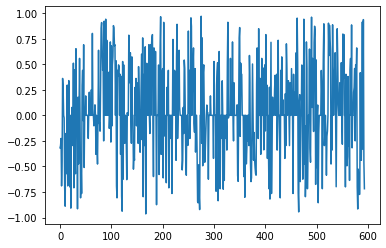

In [ ]:
suif_80_df['sentiment_score'].plot()

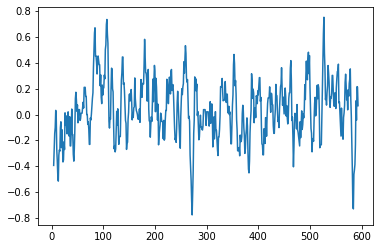

In [ ]:
suif_80_df.rolling(5)['sentiment_score'].mean().plot()

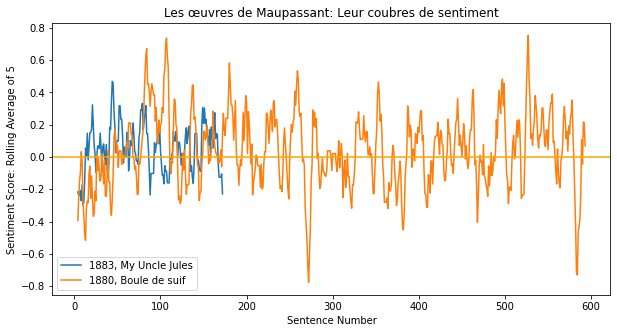

In [ ]:
ax = jules_83_df.rolling(5)['sentiment_score'].mean().plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title = "Les œuvres de Maupassant: Leur coubres de sentiment", label = "1883, My Uncle Jules",legend = True)
suif_80_df.rolling(5)['sentiment_score'].mean().plot(ax = ax, kind='line', label = "1880, Boule de suif",legend = True)
ax.set_xlabel("Sentence Number")
ax.set_ylabel("Sentiment Score: Rolling Average of 5")
plt.axhline(y=0, color='orange', linestyle='-')

**...Thus, From Here on, Plot only Normalized Plots for Multiple Texts**

###Normalized Graph

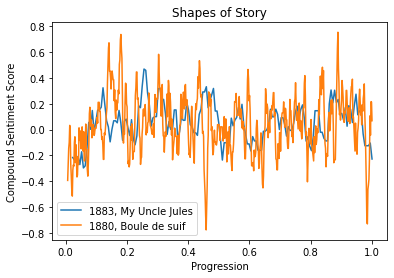

In [ ]:
suif_80_rolling_score = suif_80_df.rolling(5)['sentiment_score'].mean()
x_80 = np.linspace(0, 1, len(suif_80_sentences))
fig, ax = plt.subplots()
ax.plot(x_83, jules_83_rolling_score, label = "1883, My Uncle Jules")
ax.plot(x_80, suif_80_rolling_score, label = "1880, Boule de suif")
plt.xlabel("Progression")
plt.ylabel("Compound Sentiment Score")
plt.title("Shapes of Story")
plt.legend(loc = 0)

##The Necklace, 1888

###Preparations

In [ ]:
necklace_88 = []
with open('THE_DIAMOND_NECKLACE.txt', 'r') as necklace_f:
  for line in necklace_f.readlines():
    necklace_88.append(line.strip())
necklace_88

['THE DIAMOND NECKLACE',
 'The girl was one of those pretty and charming young creatures who sometimes are born, as if by a slip of fate, into a family of clerks. She had no dowry, no expectations, no way of being known, understood, loved, married by any rich and distinguished man; so she let herself be married to a little clerk of the Ministry of Public Instruction.',
 '',
 'She dressed plainly because she could not dress well, but she was unhappy as if she had really fallen from a higher station; since with women there is neither caste nor rank, for beauty, grace and charm take the place of family and birth. Natural ingenuity, instinct for what is elegant, a supple mind are their sole hierarchy, and often make of women of the people the equals of the very greatest ladies.',
 '',
 "Mathilde suffered ceaselessly, feeling herself born to enjoy all delicacies and all luxuries. She was distressed at the poverty of her dwelling, at the bareness of the walls, at the shabby chairs, the uglin

In [ ]:
for line in necklace_88:
  if line == "":
    necklace_88.remove(line)
for line in necklace_88:
  if line == "":
    necklace_88.remove(line)
pprint(necklace_88)

['THE DIAMOND NECKLACE',
 'The girl was one of those pretty and charming young creatures who sometimes '
 'are born, as if by a slip of fate, into a family of clerks. She had no '
 'dowry, no expectations, no way of being known, understood, loved, married by '
 'any rich and distinguished man; so she let herself be married to a little '
 'clerk of the Ministry of Public Instruction.',
 'She dressed plainly because she could not dress well, but she was unhappy as '
 'if she had really fallen from a higher station; since with women there is '
 'neither caste nor rank, for beauty, grace and charm take the place of family '
 'and birth. Natural ingenuity, instinct for what is elegant, a supple mind '
 'are their sole hierarchy, and often make of women of the people the equals '
 'of the very greatest ladies.',
 'Mathilde suffered ceaselessly, feeling herself born to enjoy all delicacies '
 'and all luxuries. She was distressed at the poverty of her dwelling, at the '
 'bareness of the wall

In [ ]:
necklace_88_str = " ".join(necklace_88)
necklace_88_str

"THE DIAMOND NECKLACE The girl was one of those pretty and charming young creatures who sometimes are born, as if by a slip of fate, into a family of clerks. She had no dowry, no expectations, no way of being known, understood, loved, married by any rich and distinguished man; so she let herself be married to a little clerk of the Ministry of Public Instruction. She dressed plainly because she could not dress well, but she was unhappy as if she had really fallen from a higher station; since with women there is neither caste nor rank, for beauty, grace and charm take the place of family and birth. Natural ingenuity, instinct for what is elegant, a supple mind are their sole hierarchy, and often make of women of the people the equals of the very greatest ladies. Mathilde suffered ceaselessly, feeling herself born to enjoy all delicacies and all luxuries. She was distressed at the poverty of her dwelling, at the bareness of the walls, at the shabby chairs, the ugliness of the curtains. Al

In [ ]:
necklace_88_sentences = tokenizer.tokenize(necklace_88_str)
for number, sentence in enumerate(necklace_88_sentences):
    print(number, sentence)

0 THE DIAMOND NECKLACE The girl was one of those pretty and charming young creatures who sometimes are born, as if by a slip of fate, into a family of clerks.
1 She had no dowry, no expectations, no way of being known, understood, loved, married by any rich and distinguished man; so she let herself be married to a little clerk of the Ministry of Public Instruction.
2 She dressed plainly because she could not dress well, but she was unhappy as if she had really fallen from a higher station; since with women there is neither caste nor rank, for beauty, grace and charm take the place of family and birth.
3 Natural ingenuity, instinct for what is elegant, a supple mind are their sole hierarchy, and often make of women of the people the equals of the very greatest ladies.
4 Mathilde suffered ceaselessly, feeling herself born to enjoy all delicacies and all luxuries.
5 She was distressed at the poverty of her dwelling, at the bareness of the walls, at the shabby chairs, the ugliness of the c

In [ ]:
necklace_88_sentence_scores = []
for number, sentence in enumerate(necklace_88_sentences):
  scores = sentiment_analyzer.polarity_scores(sentence)
  necklace_88_sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
necklace_88_df = pd.DataFrame(necklace_88_sentence_scores)

###Graphing

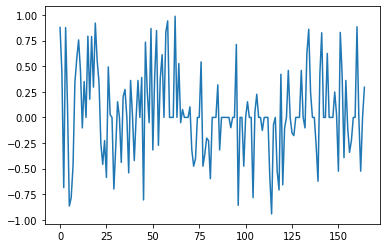

In [ ]:
necklace_88_df['sentiment_score'].plot()

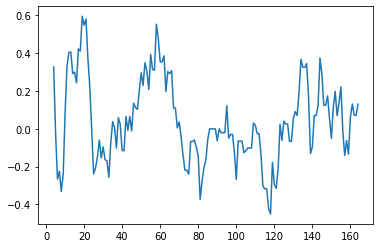

In [ ]:
necklace_88_df.rolling(5)['sentiment_score'].mean().plot()

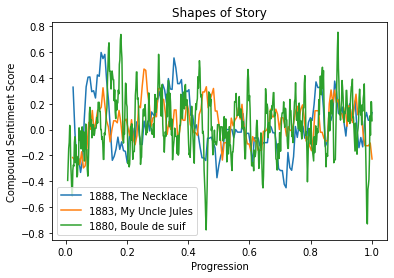

In [ ]:
necklace_88_rolling_score = necklace_88_df.rolling(5)['sentiment_score'].mean()
x_88 = np.linspace(0, 1, len(necklace_88_sentences))
fig, ax = plt.subplots()
ax.plot(x_88, necklace_88_rolling_score, label = "1888, The Necklace")
ax.plot(x_83, jules_83_rolling_score, label = "1883, My Uncle Jules")
ax.plot(x_80, suif_80_rolling_score, label = "1880, Boule de suif")
plt.xlabel("Progression")
plt.ylabel("Compound Sentiment Score")
plt.title("Shapes of Story")
plt.legend(loc = 0)

##The Wreck, 1886

###Preparation

In [ ]:
wreck_86 = []
with open('THE_WRECK.txt', 'r') as wreck_f:
  for line in wreck_f.readlines():
    wreck_86.append(line.strip())
wreck_86

['THE WRECK',
 'It was yesterday, the 31st of December.',
 '',
 'I had just finished breakfast with my old friend Georges Garin when the servant handed him a letter covered with seals and foreign stamps.',
 '',
 'Georges said:',
 '',
 '“Will you excuse me?”',
 '',
 '“Certainly.”',
 '',
 'And so he began to read the letter, which was written in a large English handwriting, crossed and recrossed in every direction. He read them slowly, with serious attention and the interest which we only pay to things which touch our hearts.',
 '',
 'Then he put the letter on the mantelpiece and said:',
 '',
 "“That was a curious story! I've never told you about it, I think. Yet it was a sentimental adventure, and it really happened to me. That was a strange New Year's Day, indeed! It must have been twenty years ago, for I was then thirty and am now fifty years old.",
 '',
 "“I was then an inspector in the Maritime Insurance Company, of which I am now director. I had arranged to pass New Year's Day in P

In [ ]:
for line in wreck_86:
  if line == "":
    wreck_86.remove(line)
for line in wreck_86:
  if line == "":
    wreck_86.remove(line)
pprint(wreck_86)

['THE WRECK',
 'It was yesterday, the 31st of December.',
 'I had just finished breakfast with my old friend Georges Garin when the '
 'servant handed him a letter covered with seals and foreign stamps.',
 'Georges said:',
 '“Will you excuse me?”',
 '“Certainly.”',
 'And so he began to read the letter, which was written in a large English '
 'handwriting, crossed and recrossed in every direction. He read them slowly, '
 'with serious attention and the interest which we only pay to things which '
 'touch our hearts.',
 'Then he put the letter on the mantelpiece and said:',
 "“That was a curious story! I've never told you about it, I think. Yet it was "
 'a sentimental adventure, and it really happened to me. That was a strange '
 "New Year's Day, indeed! It must have been twenty years ago, for I was then "
 'thirty and am now fifty years old.',
 '“I was then an inspector in the Maritime Insurance Company, of which I am '
 "now director. I had arranged to pass New Year's Day in Paris—sin

In [ ]:
wreck_86_str = " ".join(wreck_86)
wreck_86_str

"THE WRECK It was yesterday, the 31st of December. I had just finished breakfast with my old friend Georges Garin when the servant handed him a letter covered with seals and foreign stamps. Georges said: “Will you excuse me?” “Certainly.” And so he began to read the letter, which was written in a large English handwriting, crossed and recrossed in every direction. He read them slowly, with serious attention and the interest which we only pay to things which touch our hearts. Then he put the letter on the mantelpiece and said: “That was a curious story! I've never told you about it, I think. Yet it was a sentimental adventure, and it really happened to me. That was a strange New Year's Day, indeed! It must have been twenty years ago, for I was then thirty and am now fifty years old. “I was then an inspector in the Maritime Insurance Company, of which I am now director. I had arranged to pass New Year's Day in Paris—since it is customary to make that day a fete—when I received a letter f

In [ ]:
wreck_86_sentences = tokenizer.tokenize(wreck_86_str)
for number, sentence in enumerate(wreck_86_sentences):
    print(number, sentence)

0 THE WRECK It was yesterday, the 31st of December.
1 I had just finished breakfast with my old friend Georges Garin when the servant handed him a letter covered with seals and foreign stamps.
2 Georges said: “Will you excuse me?” “Certainly.” And so he began to read the letter, which was written in a large English handwriting, crossed and recrossed in every direction.
3 He read them slowly, with serious attention and the interest which we only pay to things which touch our hearts.
4 Then he put the letter on the mantelpiece and said: “That was a curious story!
5 I've never told you about it, I think.
6 Yet it was a sentimental adventure, and it really happened to me.
7 That was a strange New Year's Day, indeed!
8 It must have been twenty years ago, for I was then thirty and am now fifty years old.
9 “I was then an inspector in the Maritime Insurance Company, of which I am now director.
10 I had arranged to pass New Year's Day in Paris—since it is customary to make that day a fete—when

In [ ]:
wreck_86_sentence_scores = []
for number, sentence in enumerate(wreck_86_sentences):
  scores = sentiment_analyzer.polarity_scores(sentence)
  wreck_86_sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
wreck_86_df = pd.DataFrame(wreck_86_sentence_scores)

###Graphing

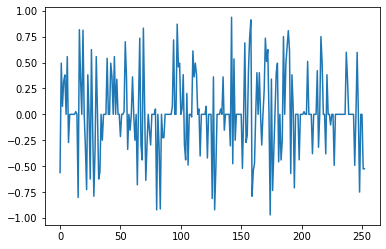

In [ ]:
wreck_86_df['sentiment_score'].plot()

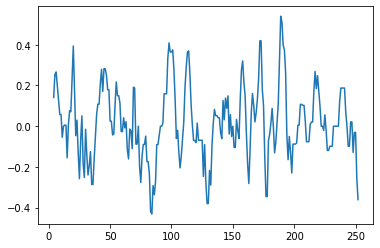

In [ ]:
wreck_86_df.rolling(5)['sentiment_score'].mean().plot()

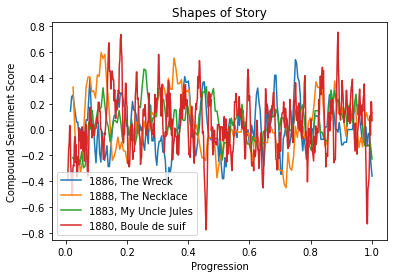

In [ ]:
wreck_86_rolling_score = wreck_86_df.rolling(5)['sentiment_score'].mean()
x_86 = np.linspace(0, 1, len(wreck_86_sentences))
fig, ax = plt.subplots()
ax.plot(x_86, wreck_86_rolling_score, label = "1886, The Wreck")
ax.plot(x_88, necklace_88_rolling_score, label = "1888, The Necklace")
ax.plot(x_83, jules_83_rolling_score, label = "1883, My Uncle Jules")
ax.plot(x_80, suif_80_rolling_score, label = "1880, Boule de suif")
plt.xlabel("Progression")
plt.ylabel("Compound Sentiment Score")
plt.title("Shapes of Story")
plt.legend(loc = 0)

##Found on a Drowned Man, 1884

###Preparation

In [ ]:
drowned_84 = []
with open('FOUND_ON_A_DROWNED_MAN.txt', 'r') as drowned_f:
  for line in drowned_f.readlines():
    drowned_84.append(line.strip())
drowned_84

['FOUND ON A DROWNED MAN',
 'Madame, you ask me whether I am laughing at you? You cannot believe that a man has never been in love. Well, then, no, no, I have never loved, never!',
 '',
 'Why is this? I really cannot tell. I have never experienced that intoxication of the heart which we call love! Never have I lived in that dream, in that exaltation, in that state of madness into which the image of a woman casts us. I have never been pursued, haunted, roused to fever heat, lifted up to Paradise by the thought of meeting, or by the possession of, a being who had suddenly become for me more desirable than any good fortune, more beautiful than any other creature, of more consequence than the whole world! I have never wept, I have never suffered on account of any of you. I have not passed my nights sleepless, while thinking of her. I have no experience of waking thoughts bright with thought and memories of her. I have never known the wild rapture of hope before her arrival, or the divine s

In [ ]:
for line in drowned_84:
  if line == "":
    drowned_84.remove(line)
for line in drowned_84:
  if line == "":
    drowned_84.remove(line)
pprint(drowned_84)

['FOUND ON A DROWNED MAN',
 'Madame, you ask me whether I am laughing at you? You cannot believe that a '
 'man has never been in love. Well, then, no, no, I have never loved, never!',
 'Why is this? I really cannot tell. I have never experienced that '
 'intoxication of the heart which we call love! Never have I lived in that '
 'dream, in that exaltation, in that state of madness into which the image of '
 'a woman casts us. I have never been pursued, haunted, roused to fever heat, '
 'lifted up to Paradise by the thought of meeting, or by the possession of, a '
 'being who had suddenly become for me more desirable than any good fortune, '
 'more beautiful than any other creature, of more consequence than the whole '
 'world! I have never wept, I have never suffered on account of any of you. I '
 'have not passed my nights sleepless, while thinking of her. I have no '
 'experience of waking thoughts bright with thought and memories of her. I '
 'have never known the wild rapture of h

In [ ]:
drowned_84_str = " ".join(drowned_84)
drowned_84_str

"FOUND ON A DROWNED MAN Madame, you ask me whether I am laughing at you? You cannot believe that a man has never been in love. Well, then, no, no, I have never loved, never! Why is this? I really cannot tell. I have never experienced that intoxication of the heart which we call love! Never have I lived in that dream, in that exaltation, in that state of madness into which the image of a woman casts us. I have never been pursued, haunted, roused to fever heat, lifted up to Paradise by the thought of meeting, or by the possession of, a being who had suddenly become for me more desirable than any good fortune, more beautiful than any other creature, of more consequence than the whole world! I have never wept, I have never suffered on account of any of you. I have not passed my nights sleepless, while thinking of her. I have no experience of waking thoughts bright with thought and memories of her. I have never known the wild rapture of hope before her arrival, or the divine sadness of regr

In [ ]:
drowned_84_sentences = tokenizer.tokenize(drowned_84_str)
for number, sentence in enumerate(drowned_84_sentences):
    print(number, sentence)

0 FOUND ON A DROWNED MAN Madame, you ask me whether I am laughing at you?
1 You cannot believe that a man has never been in love.
2 Well, then, no, no, I have never loved, never!
3 Why is this?
4 I really cannot tell.
5 I have never experienced that intoxication of the heart which we call love!
6 Never have I lived in that dream, in that exaltation, in that state of madness into which the image of a woman casts us.
7 I have never been pursued, haunted, roused to fever heat, lifted up to Paradise by the thought of meeting, or by the possession of, a being who had suddenly become for me more desirable than any good fortune, more beautiful than any other creature, of more consequence than the whole world!
8 I have never wept, I have never suffered on account of any of you.
9 I have not passed my nights sleepless, while thinking of her.
10 I have no experience of waking thoughts bright with thought and memories of her.
11 I have never known the wild rapture of hope before her arrival, or t

In [ ]:
drowned_84_sentence_scores = []
for number, sentence in enumerate(drowned_84_sentences):
  scores = sentiment_analyzer.polarity_scores(sentence)
  drowned_84_sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
drowned_84_df = pd.DataFrame(drowned_84_sentence_scores)

###Graphing

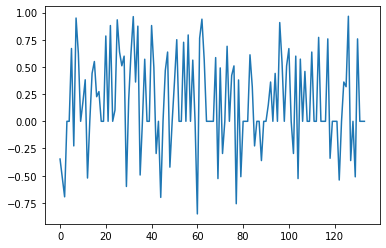

In [ ]:
drowned_84_df['sentiment_score'].plot()

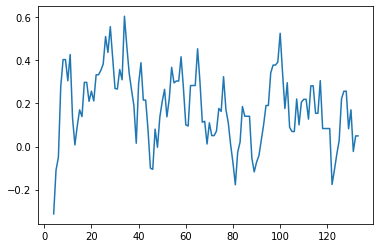

In [ ]:
drowned_84_df.rolling(5)['sentiment_score'].mean().plot()

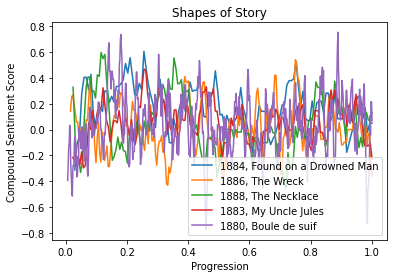

In [ ]:
drowned_84_rolling_score = drowned_84_df.rolling(5)['sentiment_score'].mean()
x_84 = np.linspace(0, 1, len(drowned_84_sentences))
fig, ax = plt.subplots()
ax.plot(x_84, drowned_84_rolling_score, label = "1884, Found on a Drowned Man")
ax.plot(x_86, wreck_86_rolling_score, label = "1886, The Wreck")
ax.plot(x_88, necklace_88_rolling_score, label = "1888, The Necklace")
ax.plot(x_83, jules_83_rolling_score, label = "1883, My Uncle Jules")
ax.plot(x_80, suif_80_rolling_score, label = "1880, Boule de suif")
plt.xlabel("Progression")
plt.ylabel("Compound Sentiment Score")
plt.title("Shapes of Story")
plt.legend(loc = 0)

##Miss Harriet, 1883

###Preparation

In [ ]:
harriet_83 = []
with open('MISS_HARRIET.txt', 'r') as harriet_f:
  for line in harriet_f.readlines():
    harriet_83.append(line.strip())
harriet_83

['MISS HARRIET',
 "There were seven of us on a drag, four women and three men; one of the latter sat on the box seat beside the coachman. We were ascending, at a snail's pace, the winding road up the steep cliff along the coast.",
 '',
 'Setting out from Etretat at break of day in order to visit the ruins of Tancarville, we were still half asleep, benumbed by the fresh air of the morning. The women especially, who were little accustomed to these early excursions, half opened and closed their eyes every moment, nodding their heads or yawning, quite insensible to the beauties of the dawn.',
 '',
 'It was autumn. On both sides of the road stretched the bare fields, yellowed by the stubble of wheat and oats which covered the soil like a beard that had been badly shaved. The moist earth seemed to steam. Larks were singing high up in the air, while other birds piped in the bushes.',
 '',
 "The sun rose at length in front of us, bright red on the plane of the horizon, and in proportion as it 

In [ ]:
for line in harriet_83:
  if line == "":
    harriet_83.remove(line)
for line in harriet_83:
  if line == "":
    harriet_83.remove(line)
pprint(harriet_83)

['MISS HARRIET',
 'There were seven of us on a drag, four women and three men; one of the '
 'latter sat on the box seat beside the coachman. We were ascending, at a '
 "snail's pace, the winding road up the steep cliff along the coast.",
 'Setting out from Etretat at break of day in order to visit the ruins of '
 'Tancarville, we were still half asleep, benumbed by the fresh air of the '
 'morning. The women especially, who were little accustomed to these early '
 'excursions, half opened and closed their eyes every moment, nodding their '
 'heads or yawning, quite insensible to the beauties of the dawn.',
 'It was autumn. On both sides of the road stretched the bare fields, yellowed '
 'by the stubble of wheat and oats which covered the soil like a beard that '
 'had been badly shaved. The moist earth seemed to steam. Larks were singing '
 'high up in the air, while other birds piped in the bushes.',
 'The sun rose at length in front of us, bright red on the plane of the '
 'horizon,

In [ ]:
harriet_83_str = " ".join(harriet_83)
harriet_83_str

"MISS HARRIET There were seven of us on a drag, four women and three men; one of the latter sat on the box seat beside the coachman. We were ascending, at a snail's pace, the winding road up the steep cliff along the coast. Setting out from Etretat at break of day in order to visit the ruins of Tancarville, we were still half asleep, benumbed by the fresh air of the morning. The women especially, who were little accustomed to these early excursions, half opened and closed their eyes every moment, nodding their heads or yawning, quite insensible to the beauties of the dawn. It was autumn. On both sides of the road stretched the bare fields, yellowed by the stubble of wheat and oats which covered the soil like a beard that had been badly shaved. The moist earth seemed to steam. Larks were singing high up in the air, while other birds piped in the bushes. The sun rose at length in front of us, bright red on the plane of the horizon, and in proportion as it ascended, growing clearer from m

In [ ]:
harriet_83_sentences = tokenizer.tokenize(harriet_83_str)
for number, sentence in enumerate(harriet_83_sentences):
    print(number, sentence)

0 MISS HARRIET There were seven of us on a drag, four women and three men; one of the latter sat on the box seat beside the coachman.
1 We were ascending, at a snail's pace, the winding road up the steep cliff along the coast.
2 Setting out from Etretat at break of day in order to visit the ruins of Tancarville, we were still half asleep, benumbed by the fresh air of the morning.
3 The women especially, who were little accustomed to these early excursions, half opened and closed their eyes every moment, nodding their heads or yawning, quite insensible to the beauties of the dawn.
4 It was autumn.
5 On both sides of the road stretched the bare fields, yellowed by the stubble of wheat and oats which covered the soil like a beard that had been badly shaved.
6 The moist earth seemed to steam.
7 Larks were singing high up in the air, while other birds piped in the bushes.
8 The sun rose at length in front of us, bright red on the plane of the horizon, and in proportion as it ascended, growi

In [ ]:
harriet_83_sentence_scores = []
for number, sentence in enumerate(harriet_83_sentences):
  scores = sentiment_analyzer.polarity_scores(sentence)
  harriet_83_sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
harriet_83_df = pd.DataFrame(harriet_83_sentence_scores)

###Graphing

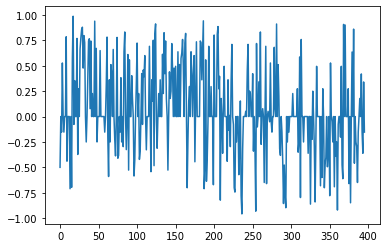

In [ ]:
harriet_83_df['sentiment_score'].plot()

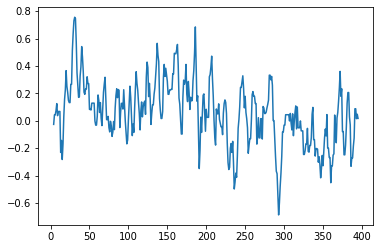

In [ ]:
harriet_83_df.rolling(5)['sentiment_score'].mean().plot()

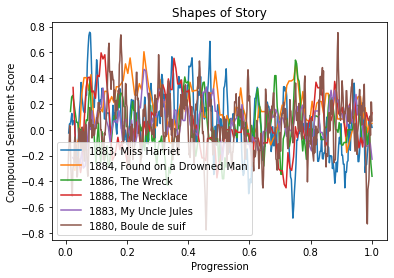

In [ ]:
harriet_83_rolling_score = harriet_83_df.rolling(5)['sentiment_score'].mean()
x_83_harriet = np.linspace(0, 1, len(harriet_83_sentences))
fig, ax = plt.subplots()
ax.plot(x_83_harriet, harriet_83_rolling_score, label = "1883, Miss Harriet")
ax.plot(x_84, drowned_84_rolling_score, label = "1884, Found on a Drowned Man")
ax.plot(x_86, wreck_86_rolling_score, label = "1886, The Wreck")
ax.plot(x_88, necklace_88_rolling_score, label = "1888, The Necklace")
ax.plot(x_83, jules_83_rolling_score, label = "1883, My Uncle Jules")
ax.plot(x_80, suif_80_rolling_score, label = "1880, Boule de suif")
plt.xlabel("Progression")
plt.ylabel("Compound Sentiment Score")
plt.title("Shapes of Story")
plt.legend(loc = 0)

##Mademoiselle Fifi, 1882

###Preparation

In [ ]:
fifi_82 = []
with open('MADEMOISELLE_FIFI.txt', 'r') as fifi_f:
  for line in fifi_f.readlines():
    fifi_82.append(line.strip())
fifi_82

['MADEMOISELLE FIFI',
 'Major Graf Von Farlsberg, the Prussian commandant, was reading his newspaper as he lay back in a great easy-chair, with his booted feet on the beautiful marble mantelpiece where his spurs had made two holes, which had grown deeper every day during the three months that he had been in the chateau of Uville.',
 '',
 'A cup of coffee was smoking on a small inlaid table, which was stained with liqueur, burned by cigars, notched by the penknife of the victorious officer, who occasionally would stop while sharpening a pencil, to jot down figures, or to make a drawing on it, just as it took his fancy.',
 '',
 'When he had read his letters and the German newspapers, which his orderly had brought him, he got up, and after throwing three or four enormous pieces of green wood on the fire, for these gentlemen were gradually cutting down the park in order to keep themselves warm, he went to the window. The rain was descending in torrents, a regular Normandy rain, which looke

In [ ]:
for line in fifi_82:
  if line == "":
    fifi_82.remove(line)
for line in fifi_82:
  if line == "":
    fifi_82.remove(line)
pprint(fifi_82)

['MADEMOISELLE FIFI',
 'Major Graf Von Farlsberg, the Prussian commandant, was reading his newspaper '
 'as he lay back in a great easy-chair, with his booted feet on the beautiful '
 'marble mantelpiece where his spurs had made two holes, which had grown '
 'deeper every day during the three months that he had been in the chateau of '
 'Uville.',
 'A cup of coffee was smoking on a small inlaid table, which was stained with '
 'liqueur, burned by cigars, notched by the penknife of the victorious '
 'officer, who occasionally would stop while sharpening a pencil, to jot down '
 'figures, or to make a drawing on it, just as it took his fancy.',
 'When he had read his letters and the German newspapers, which his orderly '
 'had brought him, he got up, and after throwing three or four enormous pieces '
 'of green wood on the fire, for these gentlemen were gradually cutting down '
 'the park in order to keep themselves warm, he went to the window. The rain '
 'was descending in torrents, a 

In [ ]:
fifi_82_str = " ".join(fifi_82)
fifi_82_str

"MADEMOISELLE FIFI Major Graf Von Farlsberg, the Prussian commandant, was reading his newspaper as he lay back in a great easy-chair, with his booted feet on the beautiful marble mantelpiece where his spurs had made two holes, which had grown deeper every day during the three months that he had been in the chateau of Uville. A cup of coffee was smoking on a small inlaid table, which was stained with liqueur, burned by cigars, notched by the penknife of the victorious officer, who occasionally would stop while sharpening a pencil, to jot down figures, or to make a drawing on it, just as it took his fancy. When he had read his letters and the German newspapers, which his orderly had brought him, he got up, and after throwing three or four enormous pieces of green wood on the fire, for these gentlemen were gradually cutting down the park in order to keep themselves warm, he went to the window. The rain was descending in torrents, a regular Normandy rain, which looked as if it were being p

In [ ]:
fifi_82_sentences = tokenizer.tokenize(fifi_82_str)
for number, sentence in enumerate(fifi_82_sentences):
    print(number, sentence)

0 MADEMOISELLE FIFI Major Graf Von Farlsberg, the Prussian commandant, was reading his newspaper as he lay back in a great easy-chair, with his booted feet on the beautiful marble mantelpiece where his spurs had made two holes, which had grown deeper every day during the three months that he had been in the chateau of Uville.
1 A cup of coffee was smoking on a small inlaid table, which was stained with liqueur, burned by cigars, notched by the penknife of the victorious officer, who occasionally would stop while sharpening a pencil, to jot down figures, or to make a drawing on it, just as it took his fancy.
2 When he had read his letters and the German newspapers, which his orderly had brought him, he got up, and after throwing three or four enormous pieces of green wood on the fire, for these gentlemen were gradually cutting down the park in order to keep themselves warm, he went to the window.
3 The rain was descending in torrents, a regular Normandy rain, which looked as if it were 

In [ ]:
fifi_82_sentence_scores = []
for number, sentence in enumerate(fifi_82_sentences):
  scores = sentiment_analyzer.polarity_scores(sentence)
  fifi_82_sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
fifi_82_df = pd.DataFrame(fifi_82_sentence_scores)

###Graphing

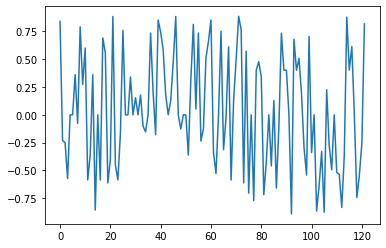

In [ ]:
fifi_82_df['sentiment_score'].plot()

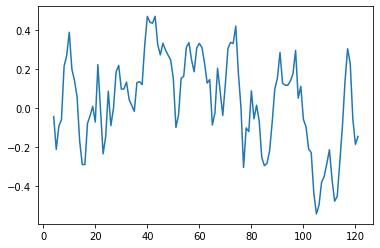

In [ ]:
fifi_82_df.rolling(5)['sentiment_score'].mean().plot()

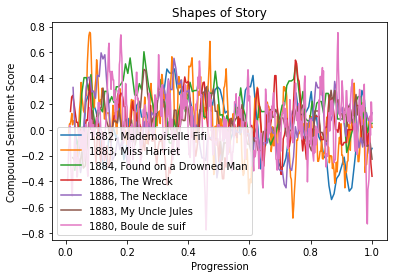

In [ ]:
fifi_82_rolling_score = fifi_82_df.rolling(5)['sentiment_score'].mean()
x_82 = np.linspace(0, 1, len(fifi_82_sentences))
fig, ax = plt.subplots()
ax.plot(x_82, fifi_82_rolling_score, label = "1882, Mademoiselle Fifi")
ax.plot(x_83_harriet, harriet_83_rolling_score, label = "1883, Miss Harriet")
ax.plot(x_84, drowned_84_rolling_score, label = "1884, Found on a Drowned Man")
ax.plot(x_86, wreck_86_rolling_score, label = "1886, The Wreck")
ax.plot(x_88, necklace_88_rolling_score, label = "1888, The Necklace")
ax.plot(x_83, jules_83_rolling_score, label = "1883, My Uncle Jules")
ax.plot(x_80, suif_80_rolling_score, label = "1880, Boule de suif")
plt.xlabel("Progression")
plt.ylabel("Compound Sentiment Score")
plt.title("Shapes of Story")
plt.legend(loc = 0)

##The Piece of String, 1883

###Preparation

In [ ]:
string_83 = []
with open('THE_PIECE_OF_STRING.txt', 'r') as _f:
  for line in _f.readlines():
    string_83.append(line.strip())
string_83

['THE PIECE OF STRING',
 'It was market-day, and from all the country round Goderville the peasants and their wives were coming toward the town. The men walked slowly, throwing the whole body forward at every step of their long, crooked legs. They were deformed from pushing the plough which makes the left-shoulder higher, and bends their figures side-ways; from reaping the grain, when they have to spread their legs so as to keep on their feet. Their starched blue blouses, glossy as though varnished, ornamented at collar and cuffs with a little embroidered design and blown out around their bony bodies, looked very much like balloons about to soar, whence issued two arms and two feet.',
 '',
 'Some of these fellows dragged a cow or a calf at the end of a rope. And just behind the animal followed their wives beating it over the back with a leaf-covered branch to hasten its pace, and carrying large baskets out of which protruded the heads of chickens or ducks. These women walked more quick

In [ ]:
for line in string_83:
  if line == "":
    string_83.remove(line)
for line in string_83:
  if line == "":
    string_83.remove(line)
pprint(string_83)

['THE PIECE OF STRING',
 'It was market-day, and from all the country round Goderville the peasants '
 'and their wives were coming toward the town. The men walked slowly, throwing '
 'the whole body forward at every step of their long, crooked legs. They were '
 'deformed from pushing the plough which makes the left-shoulder higher, and '
 'bends their figures side-ways; from reaping the grain, when they have to '
 'spread their legs so as to keep on their feet. Their starched blue blouses, '
 'glossy as though varnished, ornamented at collar and cuffs with a little '
 'embroidered design and blown out around their bony bodies, looked very much '
 'like balloons about to soar, whence issued two arms and two feet.',
 'Some of these fellows dragged a cow or a calf at the end of a rope. And just '
 'behind the animal followed their wives beating it over the back with a '
 'leaf-covered branch to hasten its pace, and carrying large baskets out of '
 'which protruded the heads of chickens 

In [ ]:
string_83_str = " ".join(string_83)
string_83_str

"THE PIECE OF STRING It was market-day, and from all the country round Goderville the peasants and their wives were coming toward the town. The men walked slowly, throwing the whole body forward at every step of their long, crooked legs. They were deformed from pushing the plough which makes the left-shoulder higher, and bends their figures side-ways; from reaping the grain, when they have to spread their legs so as to keep on their feet. Their starched blue blouses, glossy as though varnished, ornamented at collar and cuffs with a little embroidered design and blown out around their bony bodies, looked very much like balloons about to soar, whence issued two arms and two feet. Some of these fellows dragged a cow or a calf at the end of a rope. And just behind the animal followed their wives beating it over the back with a leaf-covered branch to hasten its pace, and carrying large baskets out of which protruded the heads of chickens or ducks. These women walked more quickly and energet

In [ ]:
string_83_sentences = tokenizer.tokenize(string_83_str)
for number, sentence in enumerate(string_83_sentences):
    print(number, sentence)

0 THE PIECE OF STRING It was market-day, and from all the country round Goderville the peasants and their wives were coming toward the town.
1 The men walked slowly, throwing the whole body forward at every step of their long, crooked legs.
2 They were deformed from pushing the plough which makes the left-shoulder higher, and bends their figures side-ways; from reaping the grain, when they have to spread their legs so as to keep on their feet.
3 Their starched blue blouses, glossy as though varnished, ornamented at collar and cuffs with a little embroidered design and blown out around their bony bodies, looked very much like balloons about to soar, whence issued two arms and two feet.
4 Some of these fellows dragged a cow or a calf at the end of a rope.
5 And just behind the animal followed their wives beating it over the back with a leaf-covered branch to hasten its pace, and carrying large baskets out of which protruded the heads of chickens or ducks.
6 These women walked more quickl

In [ ]:
string_83_sentence_scores = []
for number, sentence in enumerate(string_83_sentences):
  scores = sentiment_analyzer.polarity_scores(sentence)
  string_83_sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
string_83_df = pd.DataFrame(string_83_sentence_scores)

###Graphing

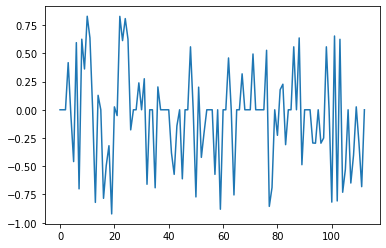

In [ ]:
string_83_df['sentiment_score'].plot()

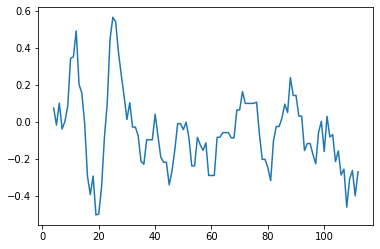

In [ ]:
string_83_df.rolling(5)['sentiment_score'].mean().plot()

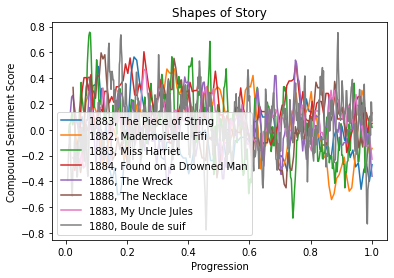

In [ ]:
string_83_rolling_score = string_83_df.rolling(5)['sentiment_score'].mean()
x_83_string = np.linspace(0, 1, len(string_83_sentences))
fig, ax = plt.subplots()
ax.plot(x_83_string, string_83_rolling_score, label = "1883, The Piece of String")
ax.plot(x_82, fifi_82_rolling_score, label = "1882, Mademoiselle Fifi")
ax.plot(x_83_harriet, harriet_83_rolling_score, label = "1883, Miss Harriet")
ax.plot(x_84, drowned_84_rolling_score, label = "1884, Found on a Drowned Man")
ax.plot(x_86, wreck_86_rolling_score, label = "1886, The Wreck")
ax.plot(x_88, necklace_88_rolling_score, label = "1888, The Necklace")
ax.plot(x_83, jules_83_rolling_score, label = "1883, My Uncle Jules")
ax.plot(x_80, suif_80_rolling_score, label = "1880, Boule de suif")
plt.xlabel("Progression")
plt.ylabel("Compound Sentiment Score")
plt.title("Shapes of Story")
plt.legend(loc = 0)

##Graph In Sum

###Overlapping Graph

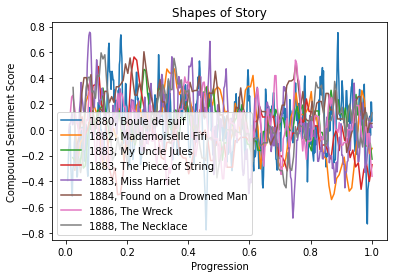

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_80, suif_80_rolling_score, label = "1880, Boule de suif")
ax.plot(x_82, fifi_82_rolling_score, label = "1882, Mademoiselle Fifi")
ax.plot(x_83, jules_83_rolling_score, label = "1883, My Uncle Jules")
ax.plot(x_83_string, string_83_rolling_score, label = "1883, The Piece of String")
ax.plot(x_83_harriet, harriet_83_rolling_score, label = "1883, Miss Harriet")
ax.plot(x_84, drowned_84_rolling_score, label = "1884, Found on a Drowned Man")
ax.plot(x_86, wreck_86_rolling_score, label = "1886, The Wreck")
ax.plot(x_88, necklace_88_rolling_score, label = "1888, The Necklace")
plt.xlabel("Progression")
plt.ylabel("Compound Sentiment Score")
plt.title("Shapes of Story")
plt.legend(loc = 0)

###Separated Graphs

Text(0.5, 1.0, '1888, The Necklace')

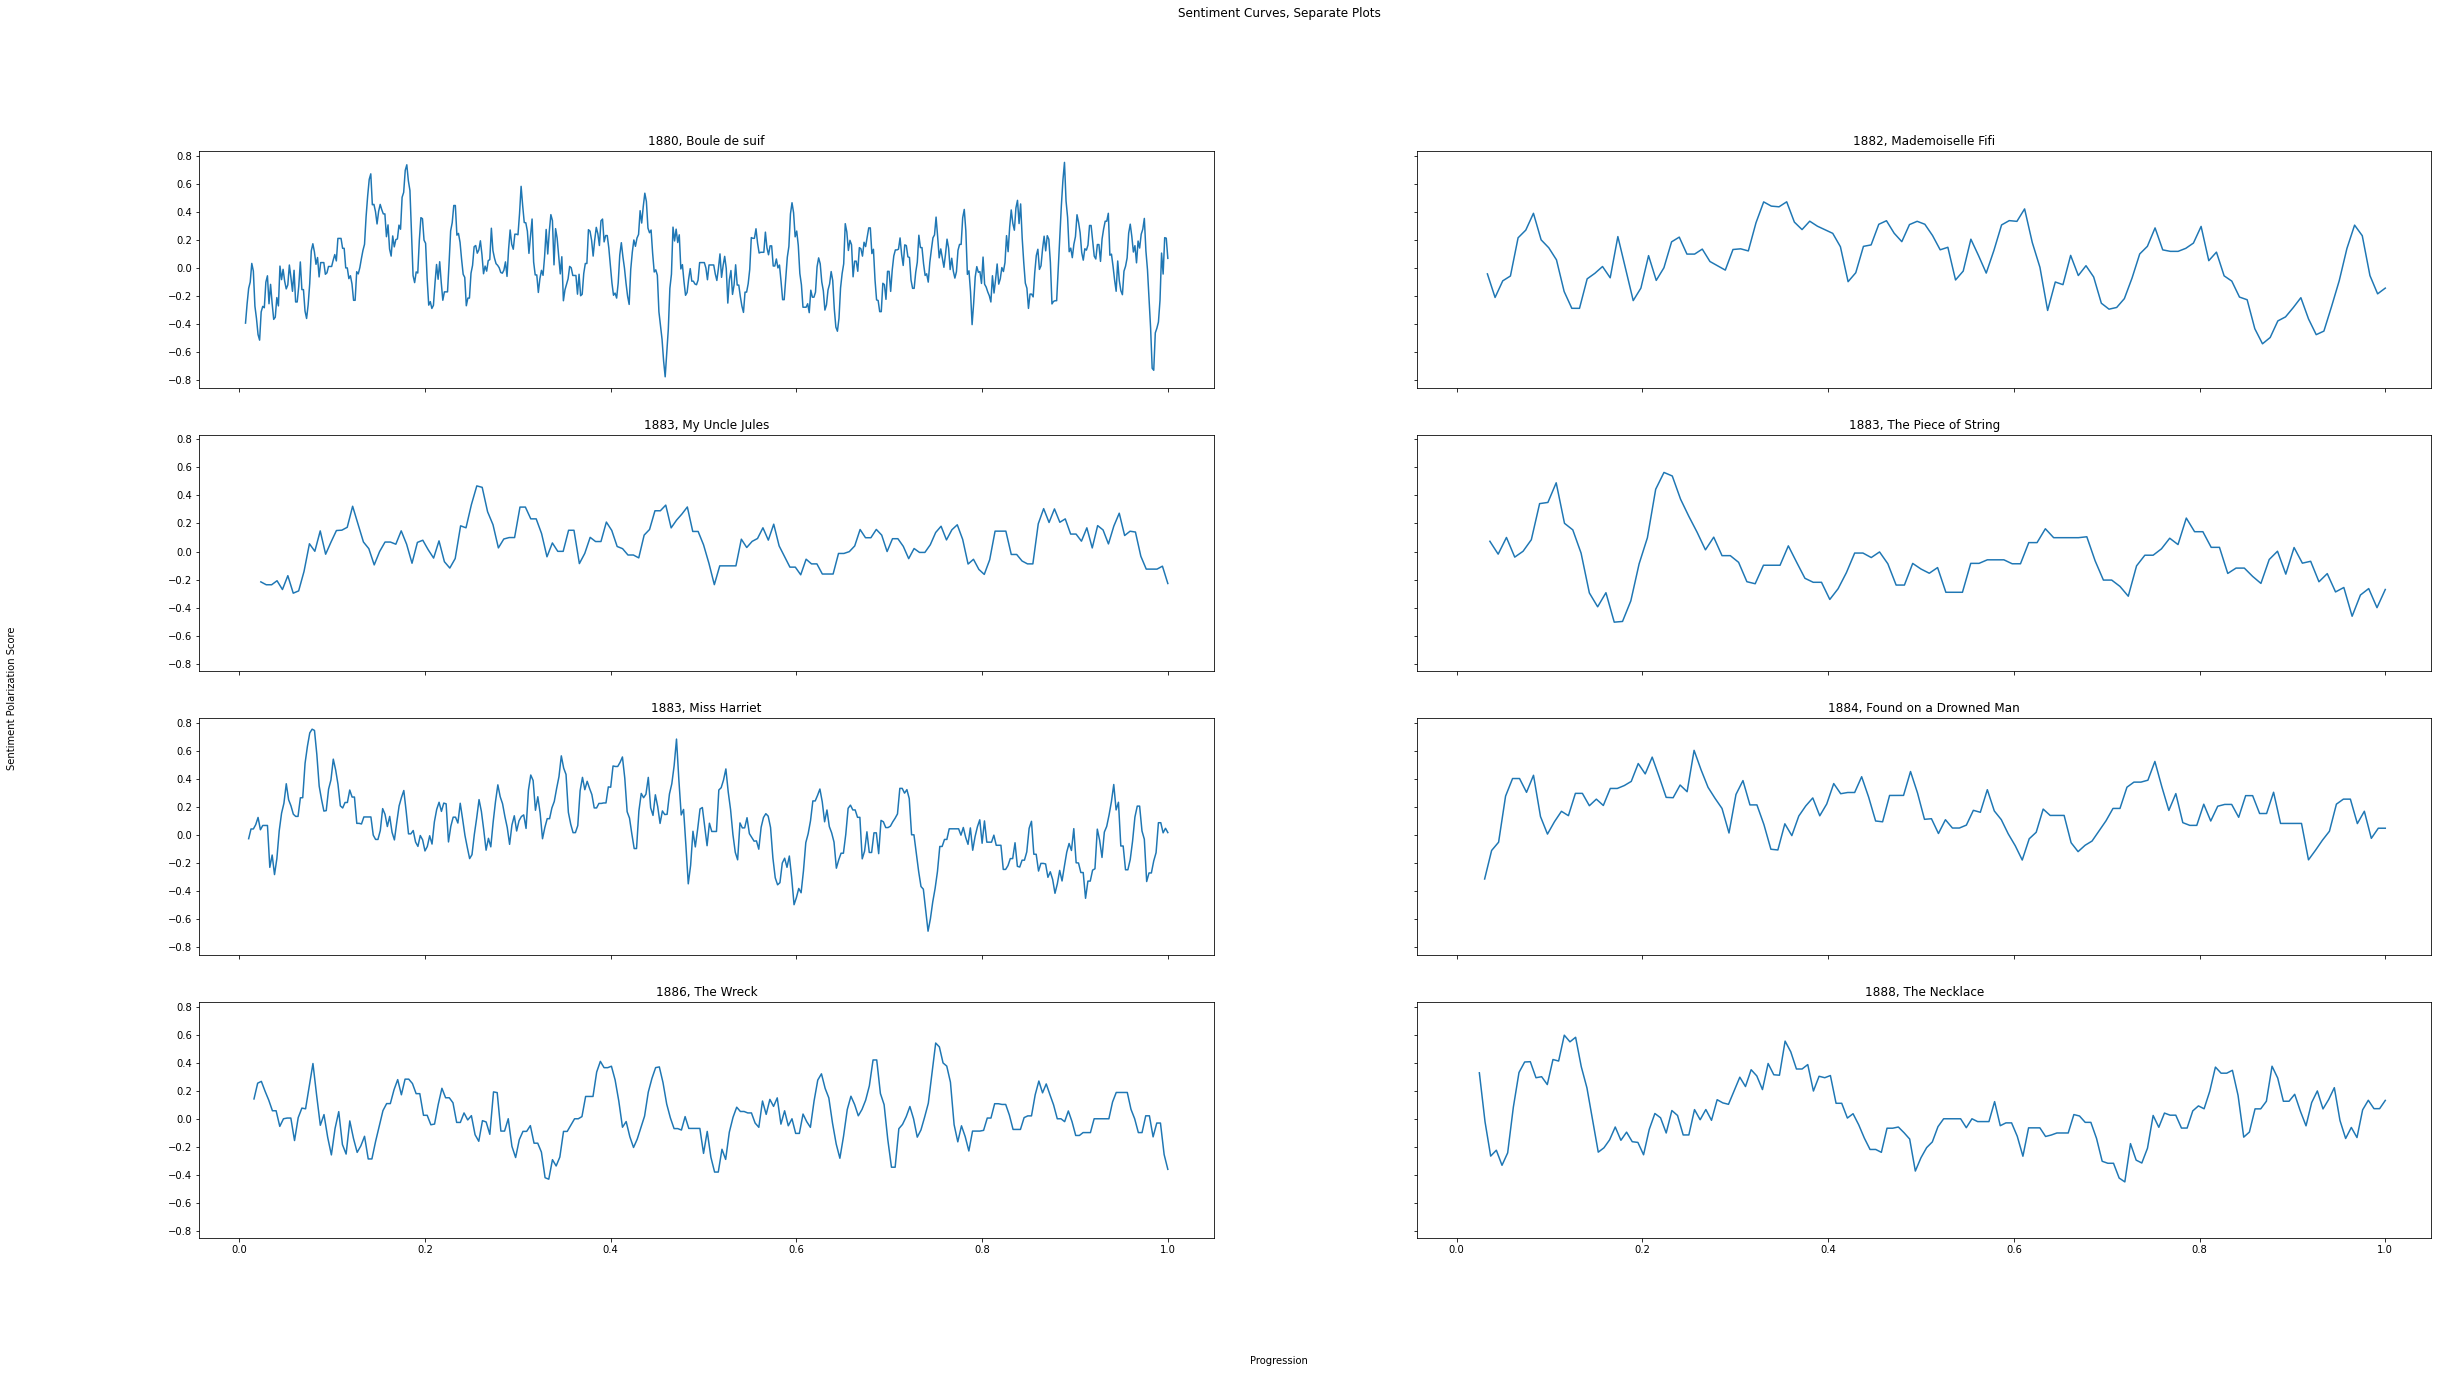

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows = 4, ncols = 2,
                                                                     sharey = True, sharex = True,
                                                                     figsize = (40, 20))
fig.suptitle("Sentiment Curves, Separate Plots")
fig.text(0.5, 0.04, 'Progression', ha='center', va='center')
fig.text(0.06, 0.5, 'Sentiment Polarization Score', ha='center', va='center', rotation='vertical')
ax1.plot(x_80, suif_80_rolling_score)
ax1.set_title("1880, Boule de suif")
ax2.plot(x_82, fifi_82_rolling_score )
ax2.set_title("1882, Mademoiselle Fifi")
ax3.plot(x_83, jules_83_rolling_score)
ax3.set_title("1883, My Uncle Jules")
ax4.plot(x_83_string, string_83_rolling_score)
ax4.set_title("1883, The Piece of String")
ax5.plot(x_83_harriet, harriet_83_rolling_score)
ax5.set_title("1883, Miss Harriet")
ax6.plot(x_84, drowned_84_rolling_score)
ax6.set_title("1884, Found on a Drowned Man")
ax7.plot(x_86, wreck_86_rolling_score)
ax7.set_title("1886, The Wreck")
ax8.plot(x_88, necklace_88_rolling_score)
ax8.set_title("1888, The Necklace")

# Word Frequency

In [ ]:
import nltk # Import NLTK
import re # Import Regular Expressions package - we'll use this to divide a text into meaningful segments
import matplotlib.pyplot as plt # we'll use matplotlib for graphs
import string # get string for its built-in punctuation list

#prepare stopword filter
nltk.download('stopwords') 
stopword_list = nltk.corpus.stopwords.words('english') 

print(string.punctuation)
stopword_list.extend(string.punctuation)

custom_stop_list = ['"','I', '"'"''", "``", 'Little','little','And','every','Every','``','--', 'My','you','You','\'s' ,'it', 'It','said','One','one','She','would','Would','But', 'They', 'The','the','He','','The', '.\"']
special_name_list = ['boule', 'Boule', 'loiseau', 'Loiseau', 'string', 'necklace','de','De','Suif','suif', 'us','Us','Loisel','lisel']
stopword_list.extend(custom_stop_list)
stopword_list.extend(special_name_list)
print(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

##Boule de Suif

In [ ]:
with open('BOULE_DE_SUIF.txt', 'r') as f_BOULE_DE_SUIF:
    BOULE_DE_SUIF = f_BOULE_DE_SUIF.read()

#divided the text into shorter segments if needed (set as 1 here for experimentation)
text = BOULE_DE_SUIF
text_length = len(text)
text_segments = [] 
number_of_segments = 1
# loop over the length of text, divide it into sections, and add them to the text_segments list
for i in range(number_of_segments):
    segment_size = text_length/number_of_segments # Determine the length of each segment
    segment_start = int(segment_size * i) # The starting point of the slice increases by segment length for each iteration of the loop
    segment_end = int(segment_size * (i +1)) # The ending point is one segment length greater than the startingn point
    text_segments.append(text[segment_start:segment_end]) # Append the slice to the segments list

print('number of segments in this text: ' + str(len(text_segments)))

tokenized_text = [nltk.wordpunct_tokenize(segment) for segment in text_segments] 

clean_text = [] # create an empty list to receive the cleaned-up tokens
for wordlist in tokenized_text:
    clean_wordlist = []
    for word in wordlist:
        if word not in stopword_list and word.isalpha(): # clear out punctuation and stopwords
            clean_wordlist.append(word.lower()) # cast words in lower case
    clean_text.append(clean_wordlist)
# find the top 3 words of the text (since I set the segment as 1 to overlook teh whole text otgether)
BOULE_DE_SUIF_freq = [nltk.FreqDist(segment) for segment in clean_text]
BOULE_DE_SUIF_most_common = [segment.most_common(10) for segment in BOULE_DE_SUIF_freq]  
print(BOULE_DE_SUIF_most_common[:10])

number of segments in this text: 1
[[('count', 34), ('cornudet', 33), ('made', 31), ('like', 29), ('two', 29), ('madame', 29), ('men', 28), ('time', 28), ('first', 28), ('could', 25)]]


##<i>FOUND_ON_A_DROWNED_MAN</i>

In [ ]:
with open('FOUND_ON_A_DROWNED_MAN.txt', 'r') as f_F_O_A_D_M:
    F_O_A_D_M = f_F_O_A_D_M.read()

In [ ]:
#divided the text into shorter segments if needed (set as 1 here for experimentation)
text = F_O_A_D_M
text_length = len(text)
text_segments = [] 
number_of_segments = 1
# loop over the length of text, divide it into sections, and add them to the text_segments list
for i in range(number_of_segments):
    segment_size = text_length/number_of_segments # Determine the length of each segment
    segment_start = int(segment_size * i) # The starting point of the slice increases by segment length for each iteration of the loop
    segment_end = int(segment_size * (i +1)) # The ending point is one segment length greater than the startingn point
    text_segments.append(text[segment_start:segment_end]) # Append the slice to the segments list

print('number of segments in this text: ' + str(len(text_segments)))

number of segments in this text: 1


In [ ]:
tokenized_text = [nltk.wordpunct_tokenize(segment) for segment in text_segments] 

clean_text = [] # create an empty list to receive the cleaned-up tokens
for wordlist in tokenized_text:
    clean_wordlist = []
    for word in wordlist:
        if word not in stopword_list and word.isalpha(): # clear out punctuation and stopwords
            clean_wordlist.append(word.lower()) # cast words in lower case
    clean_text.append(clean_wordlist)

In [ ]:
# find the top 3 words of the text (since I set the segment as 1 to overlook teh whole text otgether)
F_O_A_D_M_freq = [nltk.FreqDist(segment) for segment in clean_text]
F_O_A_D_M_most_common = [segment.most_common(10) for segment in F_O_A_D_M_freq]  
print(F_O_A_D_M_most_common[:10])

[[('never', 11), ('love', 10), ('woman', 10), ('boat', 9), ('side', 8), ('order', 7), ('dream', 6), ('in', 6), ('we', 6), ('nothing', 6)]]


##<i>MADEMOISELLE_FIFI</i>

In [ ]:
with open('MADEMOISELLE_FIFI.txt', 'r') as f_MADEMOISELLE_FIFI:
    MADEMOISELLE_FIFI = f_MADEMOISELLE_FIFI.read()

In [ ]:
#divided the text into shorter segments if needed (set as 1 here for experimentation)
text = MADEMOISELLE_FIFI
text_length = len(text)
text_segments = [] 
number_of_segments = 1
# loop over the length of text, divide it into sections, and add them to the text_segments list
for i in range(number_of_segments):
    segment_size = text_length/number_of_segments # Determine the length of each segment
    segment_start = int(segment_size * i) # The starting point of the slice increases by segment length for each iteration of the loop
    segment_end = int(segment_size * (i +1)) # The ending point is one segment length greater than the startingn point
    text_segments.append(text[segment_start:segment_end]) # Append the slice to the segments list

print('number of segments in this text: ' + str(len(text_segments)))

number of segments in this text: 1


In [ ]:
tokenized_text = [nltk.wordpunct_tokenize(segment) for segment in text_segments] 

clean_text = [] # create an empty list to receive the cleaned-up tokens
for wordlist in tokenized_text:
    clean_wordlist = []
    for word in wordlist:
        if word not in stopword_list and word.isalpha(): # clear out punctuation and stopwords
            clean_wordlist.append(word.lower()) # cast words in lower case
    clean_text.append(clean_wordlist)

In [ ]:
# find the top 3 words of the text (since I set the segment as 1 to overlook teh whole text otgether)
MADEMOISELLE_FIFI_freq = [nltk.FreqDist(segment) for segment in clean_text]
MADEMOISELLE_FIFI_most_common = [segment.most_common(10) for segment in MADEMOISELLE_FIFI_freq]  
print(MADEMOISELLE_FIFI_most_common[:10])

[[('commandant', 17), ('made', 16), ('room', 14), ('looked', 13), ('captain', 13), ('time', 12), ('mademoiselle', 11), ('fifi', 11), ('rain', 11), ('baron', 11)]]


##<i>MISS_HARRIETI</i>

In [ ]:
with open('MISS_HARRIET.txt', 'r') as f_MISS_HARRIET:
    MISS_HARRIET = f_MISS_HARRIET.read()

In [ ]:
#divided the text into shorter segments if needed (set as 1 here for experimentation)
text = MISS_HARRIET
text_length = len(text)
text_segments = [] 
number_of_segments = 1
# loop over the length of text, divide it into sections, and add them to the text_segments list
for i in range(number_of_segments):
    segment_size = text_length/number_of_segments # Determine the length of each segment
    segment_start = int(segment_size * i) # The starting point of the slice increases by segment length for each iteration of the loop
    segment_end = int(segment_size * (i +1)) # The ending point is one segment length greater than the startingn point
    text_segments.append(text[segment_start:segment_end]) # Append the slice to the segments list

print('number of segments in this text: ' + str(len(text_segments)))

number of segments in this text: 1


In [ ]:
tokenized_text = [nltk.wordpunct_tokenize(segment) for segment in text_segments] 

clean_text = [] # create an empty list to receive the cleaned-up tokens
for wordlist in tokenized_text:
    clean_wordlist = []
    for word in wordlist:
        if word not in stopword_list and word.isalpha(): # clear out punctuation and stopwords
            clean_wordlist.append(word.lower()) # cast words in lower case
    clean_text.append(clean_wordlist)

In [ ]:
# find the top 3 words of the text (since I set the segment as 1 to overlook teh whole text otgether)
MISS_HARRIET_freq = [nltk.FreqDist(segment) for segment in clean_text]
MISS_HARRIET_most_common = [segment.most_common(10) for segment in MISS_HARRIET_freq]  
print(MISS_HARRIET_most_common[:10])

[[('miss', 21), ('day', 21), ('like', 21), ('harriet', 19), ('without', 19), ('woman', 17), ('love', 16), ('suddenly', 15), ('away', 15), ('time', 15)]]


##<i>MY_UNCLE_JULES</i>

In [ ]:
with open('MY_UNCLE_JULES.txt', 'r') as f_MY_UNCLE_JULES:
    MY_UNCLE_JULES = f_MY_UNCLE_JULES.read()

In [ ]:
#divided the text into shorter segments if needed (set as 1 here for experimentation)
text = MY_UNCLE_JULES
text_length = len(text)
text_segments = [] 
number_of_segments = 1
# loop over the length of text, divide it into sections, and add them to the text_segments list
for i in range(number_of_segments):
    segment_size = text_length/number_of_segments # Determine the length of each segment
    segment_start = int(segment_size * i) # The starting point of the slice increases by segment length for each iteration of the loop
    segment_end = int(segment_size * (i +1)) # The ending point is one segment length greater than the startingn point
    text_segments.append(text[segment_start:segment_end]) # Append the slice to the segments list

print('number of segments in this text: ' + str(len(text_segments)))

number of segments in this text: 1


In [ ]:
tokenized_text = [nltk.wordpunct_tokenize(segment) for segment in text_segments] 

clean_text = [] # create an empty list to receive the cleaned-up tokens
for wordlist in tokenized_text:
    clean_wordlist = []
    for word in wordlist:
        if word not in stopword_list and word.isalpha(): # clear out punctuation and stopwords
            clean_wordlist.append(word.lower()) # cast words in lower case
    clean_text.append(clean_wordlist)

In [ ]:
# find the top 3 words of the text (since I set the segment as 1 to overlook teh whole text otgether)
MY_UNCLE_JULES_freq = [nltk.FreqDist(segment) for segment in clean_text]
MY_UNCLE_JULES_most_common = [segment.most_common(10) for segment in MY_UNCLE_JULES_freq]  
print(MY_UNCLE_JULES_most_common[:10])

[[('father', 29), ('mother', 19), ('jules', 14), ('uncle', 11), ('man', 11), ('sisters', 11), ('two', 10), ('like', 9), ('old', 8), ('poor', 8)]]


##<i>*THE_DIAMOND_NECKLACE*</i>

In [ ]:
with open('THE_DIAMOND_NECKLACE.txt', 'r') as f_THE_DIAMOND_NECKLACE:
    THE_DIAMOND_NECKLACE = f_THE_DIAMOND_NECKLACE.read()

In [ ]:
#divided the text into shorter segments if needed (set as 1 here for experimentation)
text = THE_DIAMOND_NECKLACE
text_length = len(text)
text_segments = [] 
number_of_segments = 1
# loop over the length of text, divide it into sections, and add them to the text_segments list
for i in range(number_of_segments):
    segment_size = text_length/number_of_segments # Determine the length of each segment
    segment_start = int(segment_size * i) # The starting point of the slice increases by segment length for each iteration of the loop
    segment_end = int(segment_size * (i +1)) # The ending point is one segment length greater than the startingn point
    text_segments.append(text[segment_start:segment_end]) # Append the slice to the segments list

print('number of segments in this text: ' + str(len(text_segments)))

number of segments in this text: 1


In [ ]:
tokenized_text = [nltk.wordpunct_tokenize(segment) for segment in text_segments] 

clean_text = [] # create an empty list to receive the cleaned-up tokens
for wordlist in tokenized_text:
    clean_wordlist = []
    for word in wordlist:
        if word not in stopword_list and word.isalpha(): # clear out punctuation and stopwords
            clean_wordlist.append(word.lower()) # cast words in lower case
    clean_text.append(clean_wordlist)

In [ ]:
# find the top 3 words of the text (since I set the segment as 1 to overlook teh whole text otgether)
THE_DIAMOND_NECKLACE_freq = [nltk.FreqDist(segment) for segment in clean_text]
THE_DIAMOND_NECKLACE_most_common = [segment.most_common(10) for segment in THE_DIAMOND_NECKLACE_freq]  
print(THE_DIAMOND_NECKLACE_most_common[:10])

[[('madame', 19), ('went', 12), ('husband', 11), ('thought', 10), ('ball', 10), ('go', 9), ('back', 9), ('francs', 9), ('could', 8), ('nothing', 8)]]


##<i>*THE_PIECE_OF_STRING*</i>

In [ ]:
with open('THE_PIECE_OF_STRING.txt', 'r') as f_THE_PIECE_OF_STRING:
    THE_PIECE_OF_STRING = f_THE_PIECE_OF_STRING.read()

In [ ]:
#divided the text into shorter segments if needed (set as 1 here for experimentation)
text = THE_PIECE_OF_STRING
text_length = len(text)
text_segments = [] 
number_of_segments = 1
# loop over the length of text, divide it into sections, and add them to the text_segments list
for i in range(number_of_segments):
    segment_size = text_length/number_of_segments # Determine the length of each segment
    segment_start = int(segment_size * i) # The starting point of the slice increases by segment length for each iteration of the loop
    segment_end = int(segment_size * (i +1)) # The ending point is one segment length greater than the startingn point
    text_segments.append(text[segment_start:segment_end]) # Append the slice to the segments list

print('number of segments in this text: ' + str(len(text_segments)))

number of segments in this text: 1


In [ ]:
tokenized_text = [nltk.wordpunct_tokenize(segment) for segment in text_segments] 

clean_text = [] # create an empty list to receive the cleaned-up tokens
for wordlist in tokenized_text:
    clean_wordlist = []
    for word in wordlist:
        if word not in stopword_list and word.isalpha(): # clear out punctuation and stopwords
            clean_wordlist.append(word.lower()) # cast words in lower case
    clean_text.append(clean_wordlist)

In [ ]:
# find the top 3 words of the text (since I set the segment as 1 to overlook teh whole text otgether)
THE_PIECE_OF_STRING_freq = [nltk.FreqDist(segment) for segment in clean_text]
THE_PIECE_OF_STRING_most_common = [segment.most_common(10) for segment in THE_PIECE_OF_STRING_freq]  
print(THE_PIECE_OF_STRING_most_common[:10])

[[('maitre', 16), ('hauchecorne', 11), ('man', 9), ('began', 8), ('pocketbook', 8), ('went', 7), ('mayor', 7), ('tell', 7), ('story', 7), ('market', 6)]]


##<i>*THE_WRECK*</i>

In [ ]:
with open('THE_WRECK.txt', 'r') as f_THE_WRECK:
    THE_WRECK = f_THE_WRECK.read()

In [ ]:
#divided the text into shorter segments if needed (set as 1 here for experimentation)
text = THE_WRECK
text_length = len(text)
text_segments = [] 
number_of_segments = 1
# loop over the length of text, divide it into sections, and add them to the text_segments list
for i in range(number_of_segments):
    segment_size = text_length/number_of_segments # Determine the length of each segment
    segment_start = int(segment_size * i) # The starting point of the slice increases by segment length for each iteration of the loop
    segment_end = int(segment_size * (i +1)) # The ending point is one segment length greater than the startingn point
    text_segments.append(text[segment_start:segment_end]) # Append the slice to the segments list

print('number of segments in this text: ' + str(len(text_segments)))

number of segments in this text: 1


In [ ]:
tokenized_text = [nltk.wordpunct_tokenize(segment) for segment in text_segments] 

clean_text = [] # create an empty list to receive the cleaned-up tokens
for wordlist in tokenized_text:
    clean_wordlist = []
    for word in wordlist:
        if word not in stopword_list and word.isalpha(): # clear out punctuation and stopwords
            clean_wordlist.append(word.lower()) # cast words in lower case
    clean_text.append(clean_wordlist)

In [ ]:
# find the top 3 words of the text (since I set the segment as 1 to overlook teh whole text otgether)
THE_WRECK_freq = [nltk.FreqDist(segment) for segment in clean_text]
THE_WRECK_most_common = [segment.most_common(10) for segment in THE_WRECK_freq]  
print(THE_WRECK_most_common[:10])

[[('sea', 21), ('like', 19), ('water', 14), ('ship', 14), ('three', 12), ('two', 11), ('english', 10), ('time', 10), ('girl', 10), ('began', 9)]]


##<i>*Top 2 Most frequent word for all text*</i>

In [ ]:
#a dictionary for top 2 words in each short story
my_dict_2 = {'BOULE_DE_SUIF': BOULE_DE_SUIF_most_common[0][:2],
           'FOUND_ON_A_DROWNED_MAN': F_O_A_D_M_most_common[0][:2],
           'MADEMOISELLE_FIFI': MADEMOISELLE_FIFI_most_common[0][:2],
           'MISS_HARRIET': MISS_HARRIET_most_common[0][:2],
           'MY_UNCLE_JULES': MY_UNCLE_JULES_most_common[0][:2],
           'THE_DIAMOND_NECKLACE': THE_DIAMOND_NECKLACE_most_common[0][:2],
           'THE_PIECE_OF_STRING': THE_PIECE_OF_STRING_most_common[0][:2],
           'THE_WRECK': THE_WRECK_most_common[0][:2]
           }
print(my_dict_2)

{'BOULE_DE_SUIF': [('count', 34), ('cornudet', 33)], 'FOUND_ON_A_DROWNED_MAN': [('never', 11), ('love', 10)], 'MADEMOISELLE_FIFI': [('commandant', 17), ('made', 16)], 'MISS_HARRIET': [('miss', 21), ('day', 21)], 'MY_UNCLE_JULES': [('father', 29), ('mother', 19)], 'THE_DIAMOND_NECKLACE': [('madame', 19), ('went', 12)], 'THE_PIECE_OF_STRING': [('maitre', 16), ('hauchecorne', 11)], 'THE_WRECK': [('sea', 21), ('like', 19)]}


In [ ]:
#turn the dictionary into a list
list_word = []

for word in my_dict_2.values():
  list_word.append(word)

print(list_word)

#spilt the word and count into two lists
word_B = []
count_B = []

for small_list in list_word:
  for word in small_list:
    word_B.append(word[0])
    count_B.append(word[1])

print(word_B)
print(count_B)

[[('count', 34), ('cornudet', 33)], [('never', 11), ('love', 10)], [('commandant', 17), ('made', 16)], [('miss', 21), ('day', 21)], [('father', 29), ('mother', 19)], [('madame', 19), ('went', 12)], [('maitre', 16), ('hauchecorne', 11)], [('sea', 21), ('like', 19)]]
['count', 'cornudet', 'never', 'love', 'commandant', 'made', 'miss', 'day', 'father', 'mother', 'madame', 'went', 'maitre', 'hauchecorne', 'sea', 'like']
[34, 33, 11, 10, 17, 16, 21, 21, 29, 19, 19, 12, 16, 11, 21, 19]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

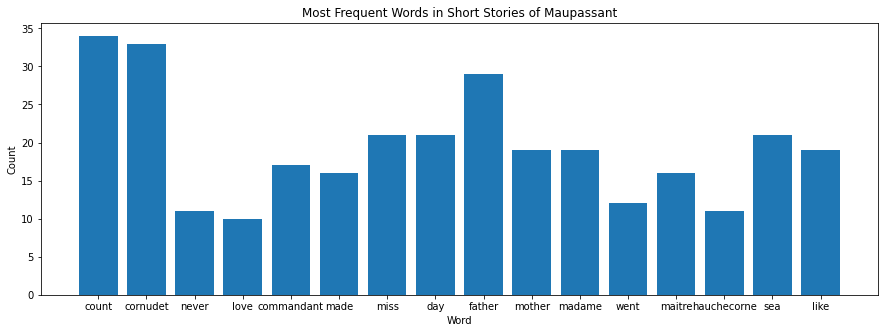

In [ ]:
#graph the top 2 frequency words and their counts
plt.figure(figsize=(15,5))
plt.bar(word_B, count_B)
plt.title('Most Frequent Words in Short Stories of Maupassant')
plt.xlabel("Word")
plt.ylabel("Count")
from google.colab import files
plt.savefig("Most Frequent Words in Short Stories of Maupassant.jpg", bbox_inches='tight')
files.download("Most Frequent Words in Short Stories of Maupassant.jpg")
plt.show()

# TF-IDF

####Here we use term-frequency inverse document frequency analysis to analyze topics and important tokens within the translated set of words that Maupassant employs in his short stories.
  

* tf-idf score  ≈  term_frequency * inverse_document_frequency   
>*in other words, term_count times the relative proportion of documents term is found within (inverse)*


In [ ]:
!pip install sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

text_files = ["THE_WRECK.txt", 
              "THE_PIECE_OF_STRING.txt", 
              "MISS_HARRIET.txt", 
              "MADEMOISELLE_FIFI.txt", 
              "MY_UNCLE_JULES.txt", 
              "FOUND_ON_A_DROWNED_MAN.txt", 
              "BOULE_DE_SUIF.txt",
              "THE_DIAMOND_NECKLACE.txt"
]

text_titles = [Path(text).stem for text in text_files]
text_titles

tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())

tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})

tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,document,term,tfidf
37307,BOULE_DE_SUIF,loiseau,0.331985
34865,BOULE_DE_SUIF,boule,0.278868
39324,BOULE_DE_SUIF,suif,0.278868
35413,BOULE_DE_SUIF,cornudet,0.219110
35435,BOULE_DE_SUIF,count,0.163261
35227,BOULE_DE_SUIF,coach,0.159353
35037,BOULE_DE_SUIF,carre,0.126154
37352,BOULE_DE_SUIF,madame,0.122093
37159,BOULE_DE_SUIF,lamadon,0.119515
37752,BOULE_DE_SUIF,officer,0.116856


### Vizualization of tf-idf using altair

In [ ]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
term_list = []

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

This is a very visually appealing graph, and communicates a great deal about what these stories revolve around. Looking at most of these stories it appears that the most frequently employed terms by Maupassant are: 


**a.**   social position and relationship ('officer','madame','husband', 'father') coupled with  
**b.**  objects of social-value that attract the attention of the reader ('ball', 'jeweler', 'market')

These do seem consistent with the few short stories I have read of Maupassant, such as 'The Gem' and 'The Necklace'.

On the other hand, "Found on a drown man" appear to be an tf-idf *outlier*: it features none of these specific relationships and concrete objects of society, instead extensively using phantamasgoric language ('dream', 'harmony', 'rosy', 'love'). 

After further investigation, this pointed me to conlcuding Maupassant has a diversity of themes and presentations in his short stories, outside of social forces. Many of Maupassants themes concerning love, death ('Yvette'), supernatural experiences ('Le Horla'), naturalistic topic perhaps more subtle and less concetrated  in his more 'famous' works. 

### Topic Modeling (using pyLDAvis library)

Below is an (unsuccessful) attempt at using topic modeling (four groups) to analyze the seven selected texts


In [ ]:
# (1) Download and Extending NLTK stopwords

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# (2) Download and reading text files
text_files = ["THE_WRECK.txt", 
              "THE_PIECE_OF_STRING.txt", 
              "MISS_HARRIET.txt", 
              "MADEMOISELLE_FIFI.txt", 
              "MY_UNCLE_JULES.txt", 
              "FOUND_ON_A_DROWNED_MAN.txt", 
              "BOULE_DE_SUIF.txt",
              "THE_DIAMOND_NECKLACE.txt"
]

with open("THE_WRECK.txt") as w:
  string1 = w.read()
  string1 = string1.rstrip()
  wreck = [string1]
with open("THE_PIECE_OF_STRING.txt") as w:
  string2 = w.read().rstrip()
  string = [string2]
with open("MISS_HARRIET.txt") as w:
  string3 = w.read().rstrip()
  harriet = [string3]
with open("MADEMOISELLE_FIFI.txt") as w:
  string4 = w.read().rstrip()
  fifi = [string4]
with open("MY_UNCLE_JULES.txt") as w:
  string5 = w.read().rstrip()
  jules = [string5]
with open("FOUND_ON_A_DROWNED_MAN.txt") as w:
  string6 = w.read().rstrip()
  drown = [string6]
with open("BOULE_DE_SUIF.txt") as w:
  string7 = w.read()
  suif = [string7]
with open("THE_DIAMOND_NECKLACE.txt") as w:
  string8 = w.read().rstrip()
  diamond = [string8]

# (3) Stripping strings
strings = [string1,string2,string3,string4,string5,string6,string7,string8]

data = [string.rstrip() for string in strings]

#----------------------------------------------------------------- Copied code from: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/  

#instlling spacy + pyLDAvis + other dependencies
!python3 -m spacy download en
!pip install pyLDAvis

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models # don't skip this

import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

# -----------------------------------Building Model using LDA (Latent Dirichlet Allocation)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
doc_lda = lda_model[corpus]
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

Cool Intertopic Distance Map visualization (interactive)

In [ ]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.037940 -0.040612       1        1  37.077553
4     -0.105513 -0.001839       2        1  27.246394
1     -0.088660  0.038844       3        1  25.079381
6      0.019597 -0.088648       4        1   5.567201
5      0.038206  0.093857       5        1   5.028199
3      0.087063 -0.000902       6        1   0.000640
0      0.087246 -0.000700       7        1   0.000633, topic_info=               Term        Freq       Total Category  logprob  loglift
771           woman   87.000000   87.000000  Default  30.0000  30.0000
401             man   88.000000   88.000000  Default  29.0000  29.0000
397            love   34.000000   34.000000  Default  28.0000  28.0000
3820           suif   33.000000   33.000000  Default  27.0000  27.0000
288              go  109.000000  109.000000  Default  26.0000  26.0000
574             see   83.000000   83.000000  Default  25.0000  25.0000
389          little   73.000000   73.000000  Default  24.0000  24.0000
438           never   34.000000   34.000000  Default  23.0000  23.0000
696            tell   40.000000   40.000000  Default  22.0000  22.0000
778           would  117.000000  117.000000  Default  21.0000  21.0000
562             say  125.000000  125.000000  Default  20.0000  20.0000
50            begin   57.000000   57.000000  Default  19.0000  19.0000
400            make  104.000000  104.000000  Default  18.0000  18.0000
704           think   49.000000   49.000000  Default  17.0000  17.0000
453           order   30.000000   30.000000  Default  16.0000  16.0000
119            come   59.000000   59.000000  Default  15.0000  15.0000
606            side   26.000000   26.000000  Default  14.0000  14.0000
3001          coach   19.000000   19.000000  Default  13.0000  13.0000
441           night   31.000000   31.000000  Default  12.0000  12.0000
394            look   97.000000   97.000000  Default  11.0000  11.0000
2284        officer   37.000000   37.000000  Default  10.0000  10.0000
927            find   35.000000   35.000000  Default   9.0000   9.0000
229             eye   54.000000   54.000000  Default   8.0000   8.0000
432            must   31.000000   31.000000  Default   7.0000   7.0000
37             away   21.000000   21.000000  Default   6.0000   6.0000
451             old   43.000000   43.000000  Default   5.0000   5.0000
364            know   60.000000   60.000000  Default   4.0000   4.0000
162             day   56.000000   56.000000  Default   3.0000   3.0000
284            give   45.000000   45.000000  Default   2.0000   2.0000
2571         mother   16.000000   16.000000  Default   1.0000   1.0000
3820           suif   32.368779   33.406872   Topic1  -5.2313   0.9606
3001          coach   18.591631   19.331469   Topic1  -5.7858   0.9531
3052       countess   14.039668   14.640437   Topic1  -6.0666   0.9503
3765           snow   11.197201   11.813530   Topic1  -6.2928   0.9386
3464   manufacturer    7.541629    8.067092   Topic1  -6.6880   0.9248
3561      passenger    6.625805    7.126595   Topic1  -6.8175   0.9193
3150         driver    6.568110    7.121362   Topic1  -6.8263   0.9113
3633        propose    5.674633    6.184641   Topic1  -6.9725   0.9061
3318        harness    5.674155    6.185349   Topic1  -6.9726   0.9059
3117        dignity    5.673568    6.185198   Topic1  -6.9727   0.9058
2994        citizen    5.672060    6.185404   Topic1  -6.9729   0.9055
3251           food    5.632193    6.178329   Topic1  -6.9800   0.8996
3560          party    4.763923    5.247760   Topic1  -7.1474   0.8954
3890        uniform    4.751534    5.247669   Topic1  -7.1500   0.8928
3450        loiseau    4.716682    5.243172   Topic1  -7.1574   0.8863
3518            nun    3.853921    4.309299   Topic1  -7.3594   0.8805
3116      dignified    3.846918    4.309596   Topic1  -7.3612   0.8786
3613       possibly    3.845492    4.309555   Topic1  -7.3616  

Although it is difficult to tell what topics this model has identified (I probably should expand stopwords), I do think it might provide more interesting visualization if this was a "Macroscopic" analysis like Jocker's, e.g., analyzing all the works of Maupassant.   


Interesting information I learned about pyLDAvis Intertopic Distance Map:
* Area is naturally proportional to amount of words contained within topic
* Uses multidimensional scaling algorithm to convert multi-dimensional data (inconceivable dimensions) and map them on conceptually understandble dimension (2d)  

**λ slider**  

> Moving lambda slider -> 1 (most frequently occuring terms in topic)  
  
>  Moving lambda slider towards -> 0 you terms more rare and exclusive to document (and therefore identify which stories fall into which catergories)


#Analysis using 1850 token sheet

Note: This code assumes text files have been imported into google drive

In [ ]:
import nltk # Import NLTK
import re # Import Regular Expressions package - we'll use this to divide a text into meaningful segments
import matplotlib.pyplot as plt # we'll use matplotlib for graphs
import string # get string for its built-in punctuation list
import pandas as pd

In [ ]:
nltk.download('stopwords') 
stopword_list = nltk.corpus.stopwords.words('english') 

print(string.punctuation)
stopword_list.extend(string.punctuation)

custom_stop_list = ['"','I', '"'"''", "``", 'Little','little','And','every','Every','``','--', 'My','you','You','\'s' ,'it', 'It','said','One','one','She','would','Would','But', 'They', 'The','the','He','','The', '.\"']
stopword_list.extend(custom_stop_list)
print(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where'

In [ ]:
# define clean and segmentation functions
def segmentation(text):
#divided the text into shorter segments if needed (set as 1 here for experimentation)
  text_length = len(text)
  text_segments = [] 
  number_of_segments = 1
# loop over the length of text, divide it into sections, and add them to the text_segments list
  for i in range(number_of_segments):
    segment_size = text_length/number_of_segments # Determine the length of each segment
    segment_start = int(segment_size * i) # The starting point of the slice increases by segment length for each iteration of the loop
    segment_end = int(segment_size * (i +1)) # The ending point is one segment length greater than the startingn point
    text_segments.append(text[segment_start:segment_end]) # Append the slice to the segments list

  return text_segments


def clean(text_segments):
  tokenized_text = [nltk.wordpunct_tokenize(segment) for segment in text_segments] 

  clean_text = [] # create an empty list to receive the cleaned-up tokens
  for wordlist in tokenized_text:
    clean_wordlist = []
    for word in wordlist:
        if word not in stopword_list and word.isalpha(): # clear out punctuation and stopwords
            clean_wordlist.append(word.lower()) # cast words in lower case
    clean_text.append(clean_wordlist)
  return clean_text


def emo_calculator(a):
  chap = 0
  for word in a:
      # chap.append(sentiment_lexicon.get(word,0))
      # print(sentiment_lexicon.get(word,0))
      chap = chap+ sentiment_lexicon.get(word,0)
      
  

  return chap


In [ ]:
# insert stopwords 


In [ ]:
text_list = []
title_list = []
with open ('gdrive/MyDrive/MY_UNCLE_JULES.txt') as f:
  MY_UNCLE_JULES = f.read()
  text_list.append(MY_UNCLE_JULES)
  title_list.append('MY_UNCLE_JULES')

with open ('gdrive/MyDrive/THE_WRECK.txt') as f:
  THE_WRECK = f.read()
  text_list.append(THE_WRECK)
  title_list.append('THE_WRECK')

with open ('gdrive/MyDrive/THE_PIECE_OF_STRING.txt') as f:
  THE_PIECE_OF_STRING = f.read()
  text_list.append(THE_PIECE_OF_STRING)
  title_list.append('THE_PIECE_OF_STRING')

with open ('gdrive/MyDrive/THE_DIAMOND_NECKLACE.txt') as f:
  THE_DIAMOND_NECKLACE = f.read()
  text_list.append(THE_DIAMOND_NECKLACE)
  title_list.append('THE_DIAMOND_NECKLACE')

with open ('gdrive/MyDrive/BOULE_DE_SUIF.txt') as f:
  BOULE_DE_SUIF = f.read()
  text_list.append(BOULE_DE_SUIF)
  title_list.append('BOULE_DE_SUIF')

with open ('gdrive/MyDrive/MISS_HARRIET.txt') as f :
  MISS_HARRIET = f.read()
  text_list.append(MISS_HARRIET)
  title_list.append('MISS_HARRIET')

with open ('gdrive/MyDrive/FOUND_ON_A_DROWNED_MAN.txt') as f:
  FOUND_ON_A_DROWNED_MAN = f.read()
  text_list.append(FOUND_ON_A_DROWNED_MAN)
  title_list.append('FOUND_ON_A_DROWNED_MAN')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
for k in clean_text:
  i = i+ emo_calculator(k)

In [ ]:
#import the 1850 file 
import csv
with open('gdrive/MyDrive/Copy of 1850.csv', 'r') as f:
    sentiments = []
    for row in csv.reader(f):
        sentiments.append(row)
print(sentiments[0])

sentiment_lexicon = {}
for row in sentiments:
  k = row[0]
  v = row[1]
  sentiment_lexicon.update([(k, float(v))])

# print(sentiment_lexicon.get('worst',0)

FileNotFoundError: ignored

In [ ]:
emo_val = []

for text in text_list:
  i = segmentation(text)
  i = clean(i)
  val = 0

  for k in i:
    val = val+ emo_calculator(k)
  emo_val.append(val)
  
print(emo_val)



score_list = []
for i in range(0,len(title_list)):

  score_list.append({'num' :i, 'name': title_list[i], 'sum of emotional valence': emo_val[i]})

In [ ]:
#draw the sum of emotional valence of all seven articles
score_list_df = pd.DataFrame(score_list)
a = score_list_df.plot(x = 'num', y = 'sum of emotional valence' ,kind = 'bar' )

##visualize the change in emotional valence of 7 articles


192
192


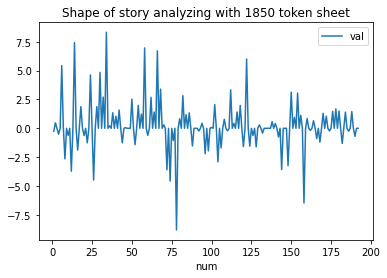

In [ ]:
#article1
line_list = []
title_list = []
with open ('gdrive/MyDrive/MY_UNCLE_JULES.txt') as f:
  for line in f.readlines():
    line_list.append(line)
print(len(line_list))
# print(line_list)
a = []  
for line in line_list:
  line = segmentation(line)
  
  a.append(clean(line))
emo_sentence_list = []
for i in a:
  sum_sentence = 0
  for word in i:
    sum_sentence += emo_calculator(word)
  emo_sentence_list.append(sum_sentence)
   
# print(emo_sentence_list)

emo_sentence = []
for i in range(0,len(line_list)):
  emo_sentence.append({'num':i+1, 'val':emo_sentence_list[i]})

emo_sentence_df = pd.DataFrame(emo_sentence)
emo_sentence_df.plot(kind = 'line',x ='num', y = 'val',title = 'Shape of story analyzing with 1850 token sheet')

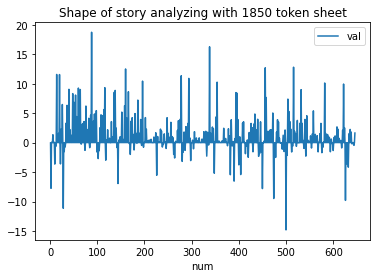

In [ ]:
# Article 2
line_list = []
title_list = []
with open ('gdrive/MyDrive/BOULE_DE_SUIF.txt') as f:
  for line in f.readlines():
    line_list.append(line)


a = []  
for line in line_list:
  line = segmentation(line)
  
  a.append(clean(line))

emo_sentence_list = []
for i in a:
  sum_sentence = 0
  for word in i:
    sum_sentence += emo_calculator(word)
  emo_sentence_list.append(sum_sentence)
   
# print(emo_sentence_list)

emo_sentence = []
for i in range(0,len(line_list)):
  emo_sentence.append({'num':i+1, 'val':emo_sentence_list[i]})

emo_sentence_df = pd.DataFrame(emo_sentence)
emo_sentence_df.plot(kind = 'line',x ='num', y = 'val',title = 'Shape of story analyzing with 1850 token sheet')


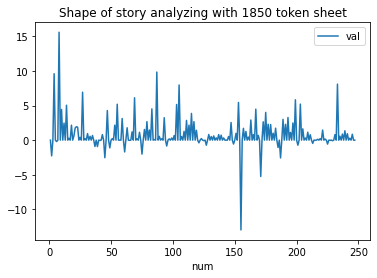

In [ ]:
#article 3

line_list = []
title_list = []
with open ('gdrive/MyDrive/THE_DIAMOND_NECKLACE.txt') as f:
  for line in f.readlines():
    line_list.append(line)


a = []  
for line in line_list:
  line = segmentation(line)
  
  a.append(clean(line))

emo_sentence_list = []
for i in a:
  sum_sentence = 0
  for word in i:
    sum_sentence += emo_calculator(word)
  emo_sentence_list.append(sum_sentence)
   
# print(emo_sentence_list)

emo_sentence = []
for i in range(0,len(line_list)):
  emo_sentence.append({'num':i+1, 'val':emo_sentence_list[i]})

emo_sentence_df = pd.DataFrame(emo_sentence)
emo_sentence_df.plot(kind = 'line',x ='num', y = 'val',title = 'Shape of story analyzing with 1850 token sheet')



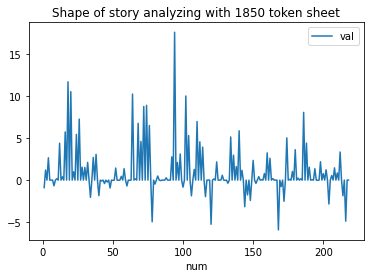

In [ ]:
#article 4

line_list = []
title_list = []
with open ('gdrive/MyDrive/THE_WRECK.txt') as f:
  for line in f.readlines():
    line_list.append(line)


a = []  
for line in line_list:
  line = segmentation(line)
  
  a.append(clean(line))

emo_sentence_list = []
for i in a:
  sum_sentence = 0
  for word in i:
    sum_sentence += emo_calculator(word)
  emo_sentence_list.append(sum_sentence)
   
# print(emo_sentence_list)

emo_sentence = []
for i in range(0,len(line_list)):
  emo_sentence.append({'num':i+1, 'val':emo_sentence_list[i]})

emo_sentence_df = pd.DataFrame(emo_sentence)
emo_sentence_df.plot(kind = 'line',x ='num', y = 'val',title = 'Shape of story analyzing with 1850 token sheet')


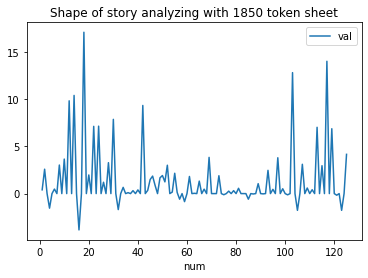

In [ ]:

#article 5
line_list = []
title_list = []
with open ('gdrive/MyDrive/FOUND_ON_A_DROWNED_MAN.txt') as f:
  for line in f.readlines():
    line_list.append(line)


a = []  
for line in line_list:
  line = segmentation(line)
  
  a.append(clean(line))

emo_sentence_list = []
for i in a:
  sum_sentence = 0
  for word in i:
    sum_sentence += emo_calculator(word)
  emo_sentence_list.append(sum_sentence)
   
# print(emo_sentence_list)

emo_sentence = []
for i in range(0,len(line_list)):
  emo_sentence.append({'num':i+1, 'val':emo_sentence_list[i]})

emo_sentence_df = pd.DataFrame(emo_sentence)
emo_sentence_df.plot(kind = 'line',x ='num', y = 'val',title = 'Shape of story analyzing with 1850 token sheet')

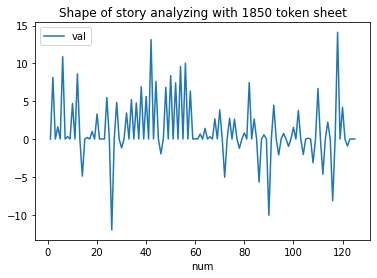

In [ ]:
# Article 6

line_list = []
title_list = []
with open ('gdrive/MyDrive/MADEMOISELLE_FIFI.txt') as f:
  for line in f.readlines():
    line_list.append(line)


a = []  
for line in line_list:
  line = segmentation(line)
  
  a.append(clean(line))

emo_sentence_list = []
for i in a:
  sum_sentence = 0
  for word in i:
    sum_sentence += emo_calculator(word)
  emo_sentence_list.append(sum_sentence)
   
# print(emo_sentence_list)

emo_sentence = []
for i in range(0,len(line_list)):
  emo_sentence.append({'num':i+1, 'val':emo_sentence_list[i]})

emo_sentence_df = pd.DataFrame(emo_sentence)
emo_sentence_df.plot(kind = 'line',x ='num', y = 'val',title = 'Shape of story analyzing with 1850 token sheet')

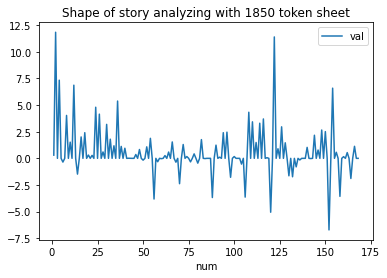

In [ ]:
#article 7
line_list = []
title_list = []
with open ('gdrive/MyDrive/THE_PIECE_OF_STRING.txt') as f:
  for line in f.readlines():
    line_list.append(line)


a = []  
for line in line_list:
  line = segmentation(line)
  
  a.append(clean(line))

emo_sentence_list = []
for i in a:
  sum_sentence = 0
  for word in i:
    sum_sentence += emo_calculator(word)
  emo_sentence_list.append(sum_sentence)
   
# print(emo_sentence_list)

emo_sentence = []
for i in range(0,len(line_list)):
  emo_sentence.append({'num':i+1, 'val':emo_sentence_list[i]})

emo_sentence_df = pd.DataFrame(emo_sentence)
emo_sentence_df.plot(kind = 'line',x ='num', y = 'val',title = 'Shape of story analyzing with 1850 token sheet')

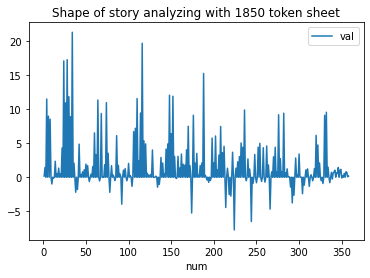

In [ ]:
# article 8

line_list = []
title_list = []
with open ('gdrive/MyDrive/MISS_HARRIET.txt') as f:
  for line in f.readlines():
    line_list.append(line)


a = []  
for line in line_list:
  line = segmentation(line)
  
  a.append(clean(line))

emo_sentence_list = []
for i in a:
  sum_sentence = 0
  for word in i:
    sum_sentence += emo_calculator(word)
  emo_sentence_list.append(sum_sentence)
   
# print(emo_sentence_list)

emo_sentence = []
for i in range(0,len(line_list)):
  emo_sentence.append({'num':i+1, 'val':emo_sentence_list[i]})

emo_sentence_df = pd.DataFrame(emo_sentence)
emo_sentence_df.plot(kind = 'line',x ='num', y = 'val',title = 'Shape of story analyzing with 1850 token sheet')

# **Conclusion**
There were several challenges in computationally investigating  Maupassant's short stories presented themselves to us while conducting this analysis and things such as his subtelty social commentaries, sense of humor, and other nuances of his writing seemingly escaped out models detections. Perhaps this small group of writings is best investigated using solely close readings. Nevertheless,not only was this a learning experience, but our group created several interesting visualizations, from replicating the story maps of Vonnegut, to cool topic visualizations, and a comparison of different sentiment analyzer models. The meaning to be extrapolated from the models is varying, almost as much as a reader's interpretation of Maupassant stories themselves, and in that sense, not only do our models preserve the interprative spirit of the works from which they spring, but also inspire new questions and perspectives within our audience's thoughts, the certaintly led me to question and revisit several of the immensely interesting Maupassant stories I had already read. 